<a href="https://colab.research.google.com/github/mayankbhati6055/Netflix_Movies_TV_shows_Clustering_Unsupervised_Learning/blob/main/Mayank_netflix_movies_shows_clustereing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -NETFLIX MOVIES AND SHOWS CLUSTERING- UNSUPERVISED LEARNING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**Mayank Bhati


# **Project Summary -**
This project's goal is to examine and cluster a Netflix-related dataset. The dataset includes a number of characteristics related to Netflix films and television shows, including title, genre, release year, runtime, rating, and others. The objective is to investigate commonalities and similarities among the platform's content and cluster them into useful groups.

The dataset will first undergo preprocessing, which includes handling missing values, eliminating pointless columns, and turning categorical variables into numerical representations. To glean useful information from the already-existing attributes, feature engineering techniques may also be used.

The dataset will then be analysed using exploratory data analysis (EDA) techniques to reveal new information. In order to comprehend the distribution of variables, spot any trends, and investigate relationships between various features, visualisations and statistical summaries will be used.

After a thorough analysis of the dataset, clustering techniques like k-means, hierarchical clustering, or density-based spatial clustering will be used. Based on their characteristics, these algorithms will group Netflix films and shows that have something in common. The elbow method or silhouette analysis will be used to calculate the ideal number of clusters.

The results of the clustering process will be assessed and interpreted. To comprehend the shared traits and patterns found within each group, the clusters will be examined. Regarding content categorization, recommendation engines, and content acquisition tactics, Netflix will benefit greatly from this analysis.

Finally, a clear and succinct summary and presentation of the results and insights from the clustering analysis will be made. The project's results will be effectively communicated using visualisations, charts, and graphs. On the basis of the discovered clusters, recommendations may also be made, outlining potential adjustments or approaches Netflix might take to improve its user interface and content selection.

Finally, the objective of this project is to analyse a Netflix dataset, use clustering methods to group related shows and films together, and offer insights and suggestions based on the clustering outcomes. The project will help the company make decisions and advance our understanding of the Netflix content ecosystem.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the dataset
netflix_df= pd.read_csv('/content/drive/MyDrive/almabetter/NETFLIX MOVIES AND SHOWS CLUSTERING UNSUPERVISED CSV/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00


### Dataset First View

In [5]:
# Dataset First Look
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [6]:
netflix_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [7]:
netflix_df['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

netflix_df.index

RangeIndex(start=0, stop=7787, step=1)

In [9]:
netflix_df.shape

(7787, 12)

In [10]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [11]:
# Dataset Info

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count

netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count

netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
# total null values in netflix dataset

netflix_df.isnull().sum().sum()

3631

In [15]:
# Visualizing the missing values
# handling null values


netflix_df['cast'].fillna(value='No cast',inplace=True)
netflix_df['country'].fillna(value=netflix_df['country'].mode()[0],inplace=True)

### What did you know about your dataset?

**This dataset contains details about different TV shows and films that are available on Netflix, such as the country of production, the year of release, the rating, the runtime, the genre, and a summary of each title. There are 12 columns and 7787 rows in it. **

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# Dataset Describe
netflix_df.describe(include='all')

show_id   type title                director     cast        country  \
count     7787   7787  7787                    5398     7787           7787   
unique    7787      2  7787                    4049     6832            681   
top         s1  Movie    3%  Raúl Campos, Jan Suter  No cast  United States   
freq         1   5377     1                      18      718           3062   
mean       NaN    NaN   NaN                     NaN      NaN            NaN   
std        NaN    NaN   NaN                     NaN      NaN            NaN   
min        NaN    NaN   NaN                     NaN      NaN            NaN   
25%        NaN    NaN   NaN                     NaN      NaN            NaN   
50%        NaN    NaN   NaN                     NaN      NaN            NaN   
75%        NaN    NaN   NaN                     NaN      NaN            NaN   
max        NaN    NaN   NaN                     NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description



### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print(netflix_df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:

# Writing code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.

netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])  # First convert date_added to date time format.
netflix_df['day_added'] = netflix_df['date_added'].dt.day            # Compute day.
netflix_df['year_added'] = netflix_df['date_added'].dt.year          # Compute year.
netflix_df['month_added'] = netflix_df['date_added'].dt.month        # Compute month.

### What all manipulations have you done and insights you found?

**Answer Here.**

We can gather the following insights from the dataset:

**Director:** There are missing values in the "Director" column.

**Country:** There are missing values in the "Country" column, which have been filled with zero.

**Cast:** There are missing values in the "Cast" column, which have been filled with "No cast."

**Date Added:** There are missing values in the "Date Added" column.

 **Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in  each column has to find unique items from different columns.**

**Date_addded Column:** In the "Date Added" column, additional information has been extracted such as the day, month, and year.

**In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero.** Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.








## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
# Chart - 1 visualization code
# Chart - 1 visualization code

labels = ['TV Show', 'Movie']
values = [netflix_df.type.value_counts()[1], netflix_df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict())


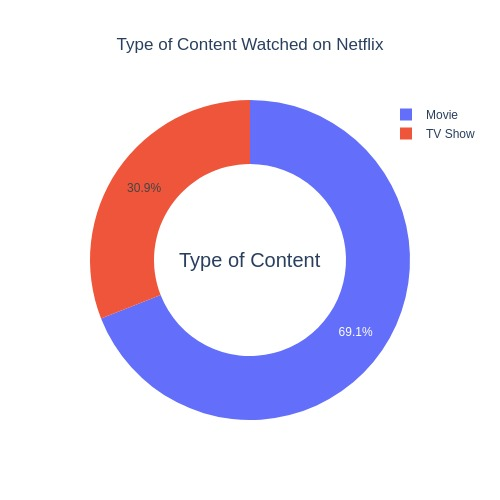

In [21]:
from IPython.display import Image
img_bytes = fig.to_image(format="jpeg", width=500, height=500, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**A pie chart is the specific diagram that the code uses. I chose this graph because it is good at illustrating how categorical data is distributed. In this instance, the chart is used to illustrate the various categories of Netflix content, including "TV Show" and "Movie."**

##### 2. What is/are the insight(s) found from the chart?

**TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**With a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for films, the data clearly favours TV shows over films. This suggests that people favour watching TV shows over films.**

#### Chart - 2

In [22]:
# Chart - 2 visualization code

# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = netflix_df[netflix_df["type"] == "TV Show"]
movie = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict( line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

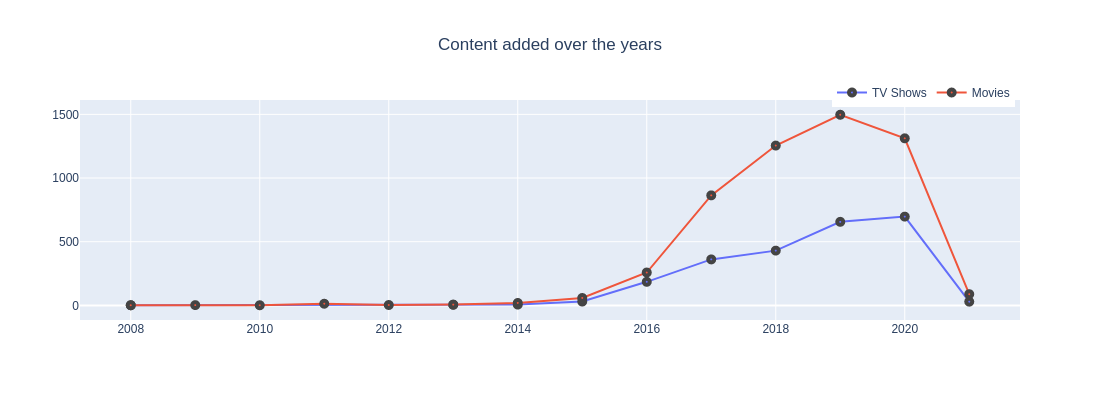

In [23]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1100, height=400, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**The line chart is useful for displaying the distribution and trend of data over a continuous axis (in this case, the years). It makes it simple to compare the two categories (movies and TV shows) and how their counts change over time.**

##### 2. What is/are the insight(s) found from the chart?

**The trend in the visualisation shows that there were comparatively fewer TV shows and films added to Netflix between 2008 and 2022. However, there was a slight increase in content additions starting in 2016. The number of films added peaked significantly in 2019, while TV shows saw a trend similar to films' but with a smaller increase**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Given the steadily rising demand for Netflix's TV shows and films over the years, the information obtained suggests that the service will benefit. This expansion gives Netflix the chance to offer its users more high-quality content, thereby boosting user satisfaction and engagement.**

#### Chart - 3

In [24]:
# Chart - 3 visualization code

# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_df['month_added'].value_counts())

# Reset the index to create a "month" column
months_df.reset_index(inplace=True)

# Rename the columns to "month" and "count"
months_df.rename(columns={'index': 'month', 'month_added': 'count'}, inplace=True)

In [25]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count')
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

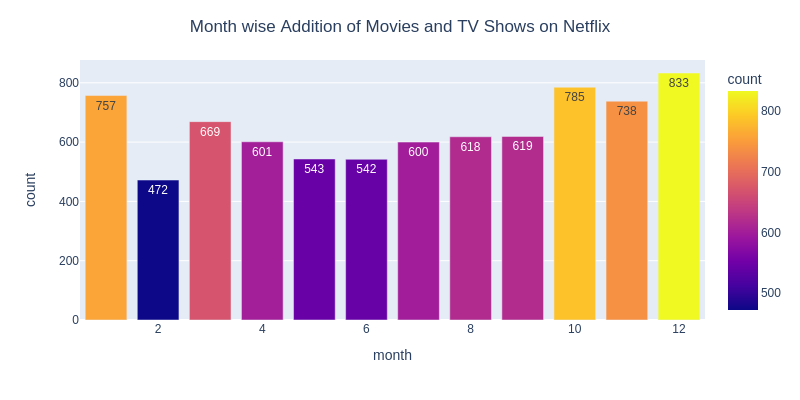

In [26]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=800, height=400, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**For comparing and displaying categorical data (months) and their corresponding counts, a bar chart is appropriate.
The graph aids in comprehending the distribution of content additions over various months and in spotting any trends or patterns.**

##### 2. What is/are the insight(s) found from the chart?

**There is a noticeable increase in the number of TV shows and films released on the Netflix platform from October to December.Halloween, Diwali, Thanksgiving, and Christmas are just a few of the holidays and celebrations that fall during the months of October to December. As a result, people tend to spend more time at home and look for entertainment options.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

The gained insights regarding the increase in TV shows and movies on the Netflix platform during the months of October to December can potentially create a positive business impact. Here are a few reasons:-

**1-Meeting Seasonal Demand**

**2-Retaining Existing Subscribers**

**3-Attracting New Subscribers**



#### Chart - 4

<Axes: xlabel='month_added', ylabel='count'>

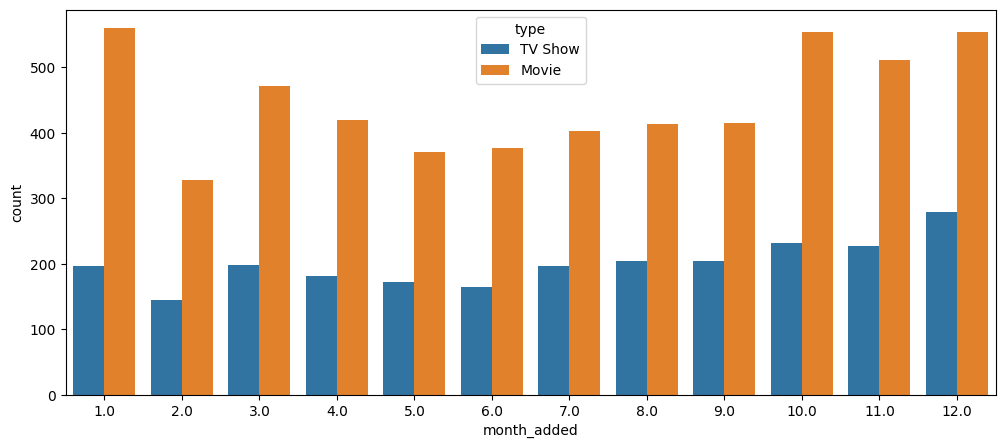

In [27]:
# Chart - 4 visualization

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_df, ax=ax)

##### 1. Why did you pick the specific chart?

**We can quickly see and contrast the frequencies of TV show and movie additions for each month by using a countplot.**

##### 2. What is/are the insight(s) found from the chart?

Movies:

**January, October, and December appear to be the trending months for movie additions on Netflix compared to other months.**

Tv Shows:

**October, November, and December emerge as the trending months for TV show additions on Netflix compared to other months.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

The gained insights regarding the trending months for movies and TV shows on Netflix can potentially create a positive business impact. Here's why:

**1-Meeting Viewer Demand:**

**2-Capitalizing on Seasonal Trends:**

**3-Improved Competitiveness:**

#### Chart - 5

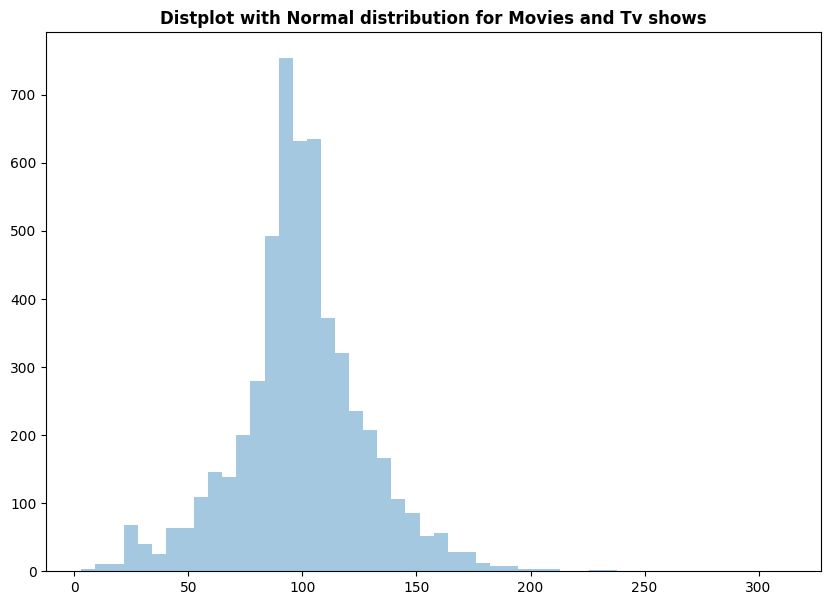

In [28]:
# Chart - 5 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False)
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

**The Distplot is a good option for this analysis because it enables us to see how frequently or how many films there are that fall into various duration ranges.**

##### 2. What is/are the insight(s) found from the chart?

**Depending on the specific Netflix content, films and TV shows with running times between 50 and 150 minutes may vary in length.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Effect on Business:

**Netflix can accommodate the diverse preferences and schedules of its audience by providing films and TV shows in a range of lengths, from shorter comedies to longer epic productions**.

**Increased Engagement: Films and television programmes of various lengths give viewers the chance to select media that fits their available time. Longer viewing sessions and greater engagement may result from this.**

**Content Diversity: Netflix can diversify its content library and support a range of genres and storytelling formats by adding films and TV shows of various lengths.**

#### Chart - 6

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

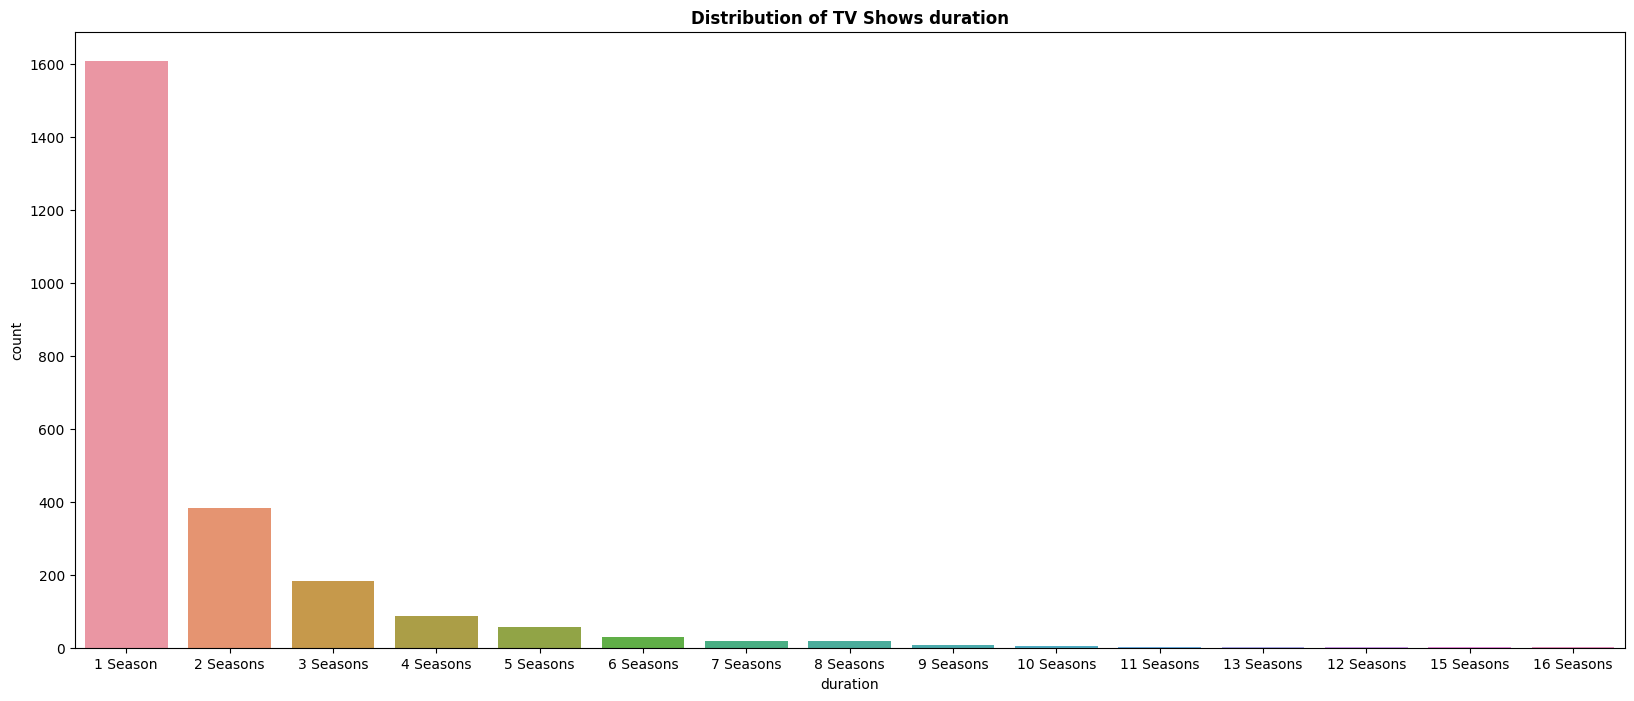

In [29]:
# Chart - 6 visualization code

#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

**A countplot, a type of bar chart that displays the frequency or count of each category in a categorical variable, is what the in question chart is. It appears to be used to show how TV show seasons are distributed.**

##### 2. What is/are the insight(s) found from the chart?

**The majority of TV shows or web series in the dataset only have one season, according to the chart, while the remaining shows have a maximum of two, three, four, or five seasons.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, there is a positive impact because content creators and streaming platforms can better plan their production now that they are aware that the majority of TV shows only have a few seasons. They can allocate resources more effectively, cut production costs, and perhaps even boost content output.**

#### Chart - 7

([<matplotlib.patches.Wedge at 0x7ba5f11e4430>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

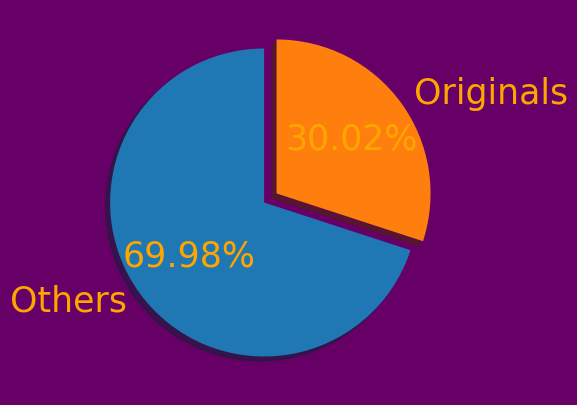

In [30]:
# Chart - 7 visualization code

movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"orange", 'fontsize': 25})

##### 1. Why did you pick the specific chart?

**Pie plots are a good option for displaying categorical data, such as the percentage of "originals" and "others" in this situation. It enables you to see how each category's relative sizes fit into the overall picture.**

##### 2. What is/are the insight(s) found from the chart?

**30% of the films on Netflix are Netflix originals, and the remaining 70% are motion pictures that were initially released through various distribution channels before being added to Netflix.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Gaining insights can definitely have a positive impact on your business. The streaming service can make wise choices about content acquisition and production by knowing how films are distributed on Netflix, such as the ratio of original content to non-original content.**

#### Chart - 8

In [34]:
# Chart - 8 visualization code

top_10_Genre = netflix_df['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

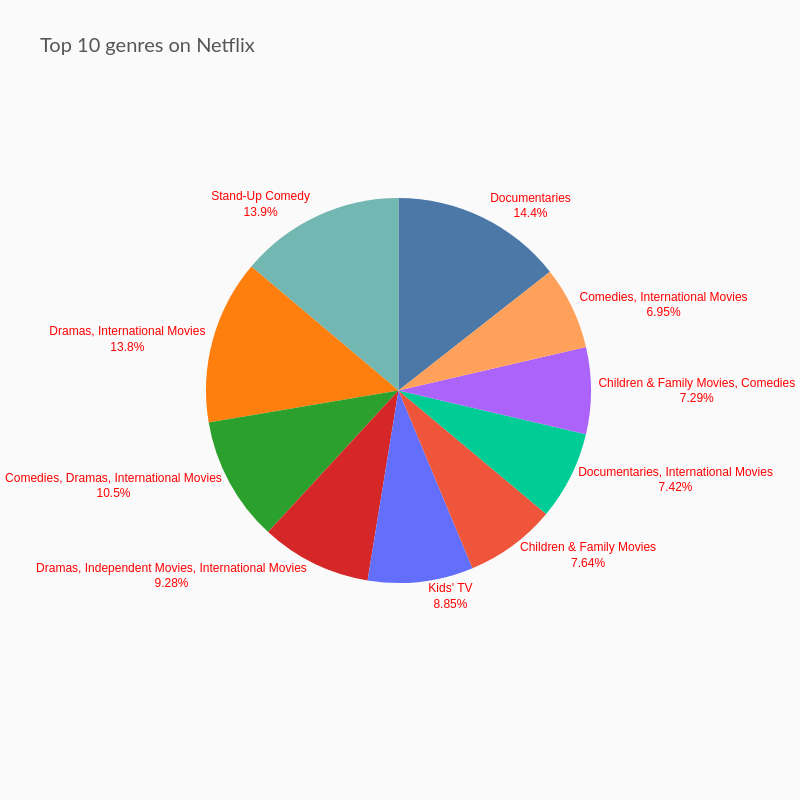

In [35]:
from IPython.display import Image
img_bytes = fig2.to_image(format="png", width=800, height=800, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**By comparing the relative areas of the slices, viewers can quickly compare the sizes of various genres thanks to the pie chart's circular shape. The additional information and improved readability of the chart are provided by the supplementary labels and percentage values outside the slices.**

##### 2. What is/are the insight(s) found from the chart?

In this chart, the top three genres on Netflix based on their distribution are:

**1-Documentaries: 14.4%**

**2-Stand-up Comedy: 13.9%**

**3-Drama, International Movies: 13.8%**

**These genres have the highest percentages compared to the other genres included in the top 10 list.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

**The gained insights from analyzing the distribution of genres on Netflix can potentially help create a positive business impact in several ways**

**1-Content Curation : By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies and shows to its subscrib**ers

**2-Targeted Acquisitions and Productions : It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition**

**3-Personalized Recommendations: Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform**

#### Chart - 9

In [36]:
# Chart - 9 visualization code

# Create subset of dataset with required data.
conuntryVSgenre = netflix_df[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

In [37]:
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [38]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

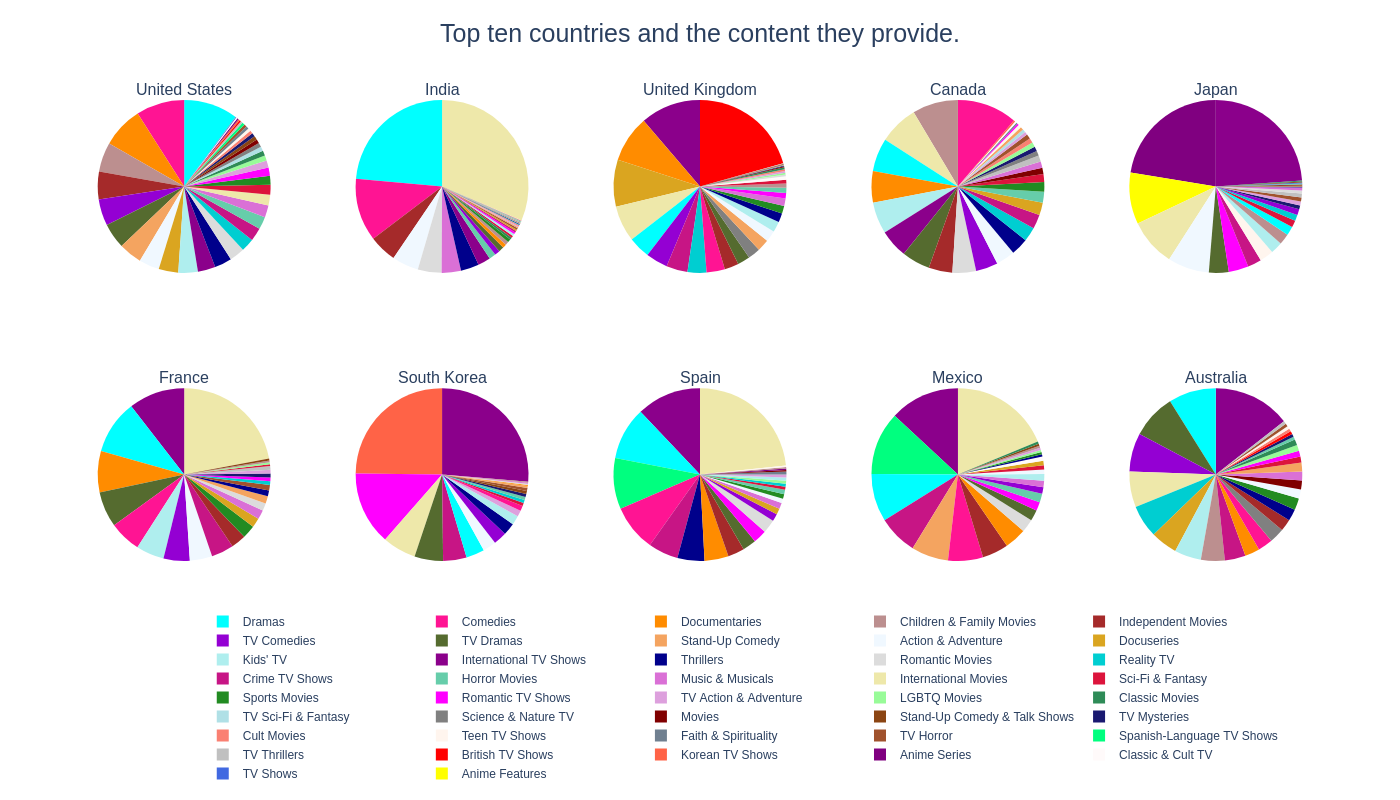

In [39]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**It is appropriate for illustrating how various genres are distributed across numerous nations. Each pie chart represents a nation, and the pie pieces stand in for several genres. The size of each slice represents the percentage of that genre's material for a specific nation. This makes it simple and aesthetically appealing to compare the distribution of genre across nations.**

##### 2. What is/are the insight(s) found from the chart?

**The most popular genres worldwide are dramas and action & adventure. In most nations, they have the greatest valuations, which shows how well-liked they are.Action & Adventure, Dramas, Comedies, and Documentaries are among the many genres of entertainment that are widely available in the United States.**

**With relatively fewer options in other genres, Independent Movies and Dramas are heavily marketed in India.**

**In the UK, there is a decent mix of drama, foreign TV shows, and documentaries.**

**The content available in Australia is varied and fairly evenly distributed across many genres, including dramas, comedies, international TV shows, and documentaries.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

The gained insights can potentially help create a positive business impact in the following ways:

1-**Targeted Content Strategy:** By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-**Market Expansion:**The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-**Content Localization:** Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

#### Chart - 10

In [40]:
# Chart - 10 visualization code

# number of unique values
netflix_df['release_year'].nunique()

73

In [41]:
print(f'Oldest release year : {netflix_df.release_year.min()}')
print(f'Latest release year : {netflix_df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


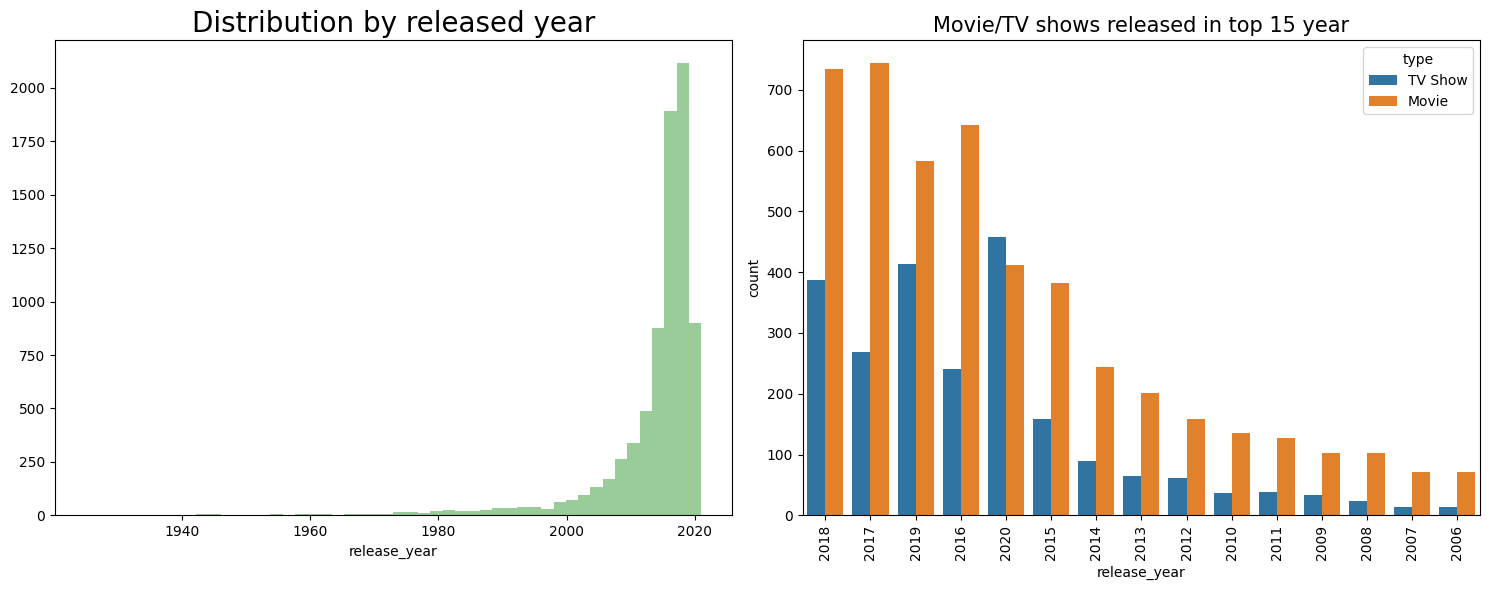

In [43]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(netflix_df['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**It is possible to do both a univariate and a bivariate analysis using the specified chart combination of a histogram and a grouped bar plot. The bar plot allows for a comparison of the number of films and TV shows released in the top 15 years, while the histogram displays the distribution of movie release years.**

##### 2. What is/are the insight(s) found from the chart?

**The histogram's distribution of release years reveals a broad pattern of Netflix movie releases beginning around 1980. The number of releases rises over time, with a noticeable uptick starting around the year 2000. The distribution's largest peak is seen between 2010 and 2020, which corresponds to a busy time for film and television production.**

**The bar graph demonstrates that 2017 and 2020 show the largest trends in terms of content type (movies, TV series). These years have seen a considerable increase in the number of Netflix releases of both TV shows and films.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the learned lessons can contribute to successful company outcomes. Businesses can decide on content acquisition, production, and marketing strategies by studying the distribution of release years and spotting trends.**

#### Chart - 11

In [45]:
# Chart - 11 visualization code

#variables description-Ratings
# number of unique values
netflix_df.rating.nunique()

14

**Variables Description- Rating**

- **TV-Y**: This rating means that the content is appropriate for all children. It is aimed at children aged 2-6 and may include educational programming.

- **TV-Y7**: This rating means that the content is appropriate for children aged 7 and up. It may contain mild violence, comic mischief, or scary content that may not be suitable for younger children.

- **TV-Y7-FV:** This rating means that the content is appropriate for children aged 7 and up, but may contain more intense violence. The "FV" stands for "fantasy violence".

- **TV-G:** This rating means that the content is appropriate for all ages. It may contain mild language or violence, but nothing too intense.

- **TV-PG:** This rating means that parental guidance is suggested. The content may contain material that parents might find inappropriate for younger children. It may include mild to moderate language, violence, or suggestive content.

- **TV-14:** This rating means that the content is appropriate for viewers aged 14 and up. It may include intense violence, strong language, or sexual situations.

- **TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language.

- **G**- This rating means that the content is appropriate for all ages. It is usually intended for young children and may include animated or family-friendly content.

- **PG:** This rating means that parental guidance is suggested. The content may include mild violence, language, or suggestive themes.

- **PG-13:**This rating means that the content is appropriate for teens aged 13 and up. It may include intense violence, language, or suggestive content.

- **R:** This rating means that the content is intended for adults. It may include graphic violence, strong language, or nudity.

- **NC-17:** This rating means that the content is intended for mature audiences only and may contain explicit sexual content or violence that is not suitable for minors.

- **NR:** This rating means that no rating has been assigned yet or that the content is not rated by a particular board.

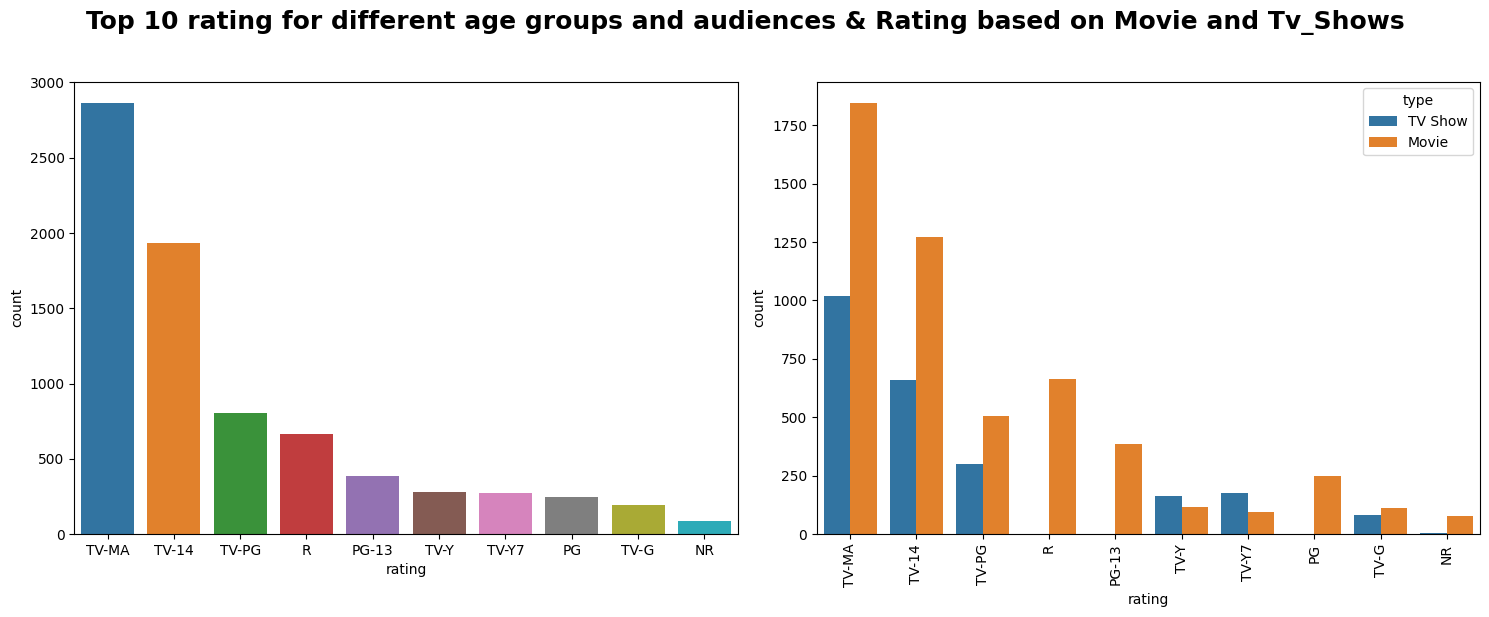

In [46]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**The two count plots chosen for the chart enable both univariate and bivariate analysis. While the second plot compares ratings specifically for films and TV shows, the first plot offers insights into the top 10 ratings across all content.**

##### 2. What is/are the insight(s) found from the chart?

**TV-MA: This rating indicates that the material is only appropriate for mature audiences. It might have explicit sexual content, graphic violence, or strong language.**

**The most typical rating, which is used for both films and TV shows, is TV-MA.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Knowing that TV-MA is the most prevalent rating for both films and television shows can help with content strategies, audience targeting, programming choices, and content diversity to increase viewership and boost customer satisfaction.**

#### Chart - 12

In [48]:
# Chart - 12 visualization code

# Replace the null values in director.
netflix_df['director']=netflix_df['director'].fillna('')


In [50]:
# Create a DataFrame with director counts
directors_list = netflix_df.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Create a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generate a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()


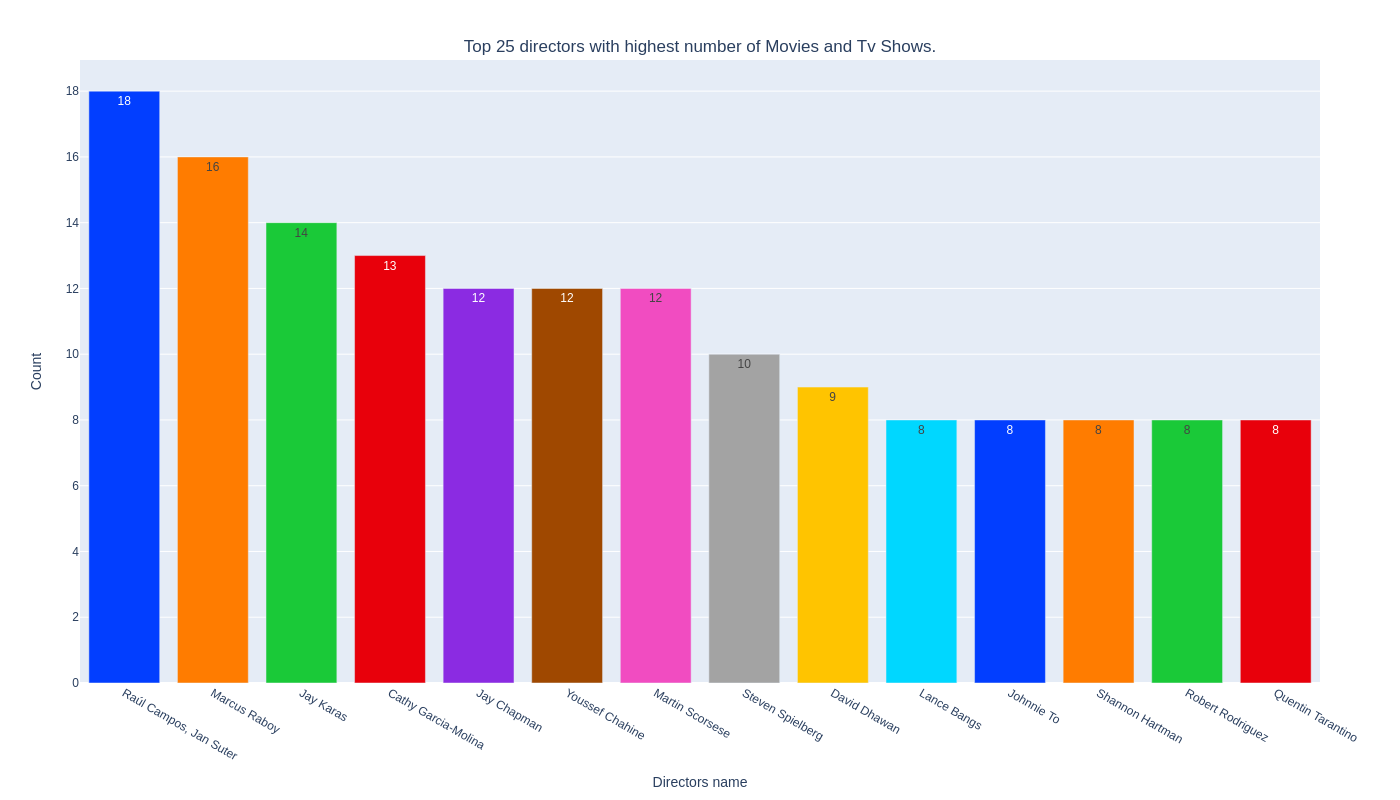

In [51]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**Viewers can quickly identify the directors who have made the most contributions on Netflix thanks to the effective presentation of the data in the chosen chart, which is simple to understand and visually appealing.**

##### 2. What is/are the insight(s) found from the chart?

**In terms of the total number of Netflix films and TV shows, Ral Campos and Jan Suter have the most.**

#### Chart - 13

In [52]:
# Chart - 13 visualization

netflix_df['listed_in'].value_counts().head(30)

Documentaries                                             334
Stand-Up Comedy                                           321
Dramas, International Movies                              320
Comedies, Dramas, International Movies                    243
Dramas, Independent Movies, International Movies          215
Kids' TV                                                  205
Children & Family Movies                                  177
Documentaries, International Movies                       172
Children & Family Movies, Comedies                        169
Comedies, International Movies                            161
Dramas, International Movies, Romantic Movies             153
Comedies, International Movies, Romantic Movies           139
Dramas                                                    117
Action & Adventure, Dramas, International Movies          117
International TV Shows, TV Dramas                         111
Dramas, International Movies, Thrillers                   109
Crime TV

In [54]:
import plotly.express as px
import pandas as pd

counts = netflix_df['listed_in'].value_counts().head(10)
average = counts.mean()

df = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]
fig = px.bar(df, x='Category', y='Count', color='Category', color_discrete_sequence=colors)
fig.add_hline(y=average, line_color='blue')
fig.update_layout(title='Top 10 Average Genere with Count',title_x=0.3)

fig.show()

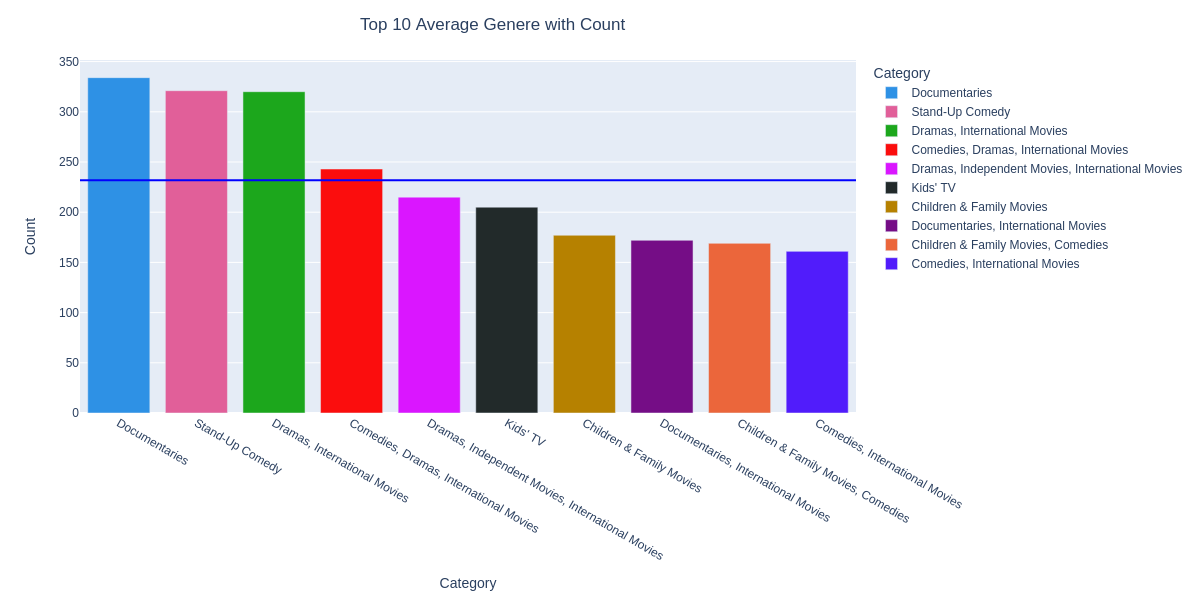

In [56]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1200, height=600, scale=1)
Image(img_bytes)

##### 1. Why did you pick the specific chart?

**The selected chart successfully communicates the data, enabling viewers to quickly compare the Average counts of various genres.**

##### 2. What is/are the insight(s) found from the chart?

**The top 10 categories have between 200 and 250 genres on average. Documentaries have the highest number of entries out of all the genres, with 334.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the discovered insights can help a streaming service like Netflix or any other business in the entertainment sector make a profit.With the help of these insights, businesses can improve their content strategies, increase viewer satisfaction, reach a wider audience, and ultimately have a positive impact on their bottom line in terms of more viewers, fewer churning customers, and revenue growth.**

#### Chart - 14 - Correlation Heatmap

In [60]:
# Correlation Heatmap visualization code


#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)

In [61]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_df.loc[netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.471550  
Kids            0.027322  0.022388        0.093199       0.089601  
Older Kids      0.120219  0.044776        0.204030       0.195553  
Teens           0.382514  0.097015        0.188917       0.243296

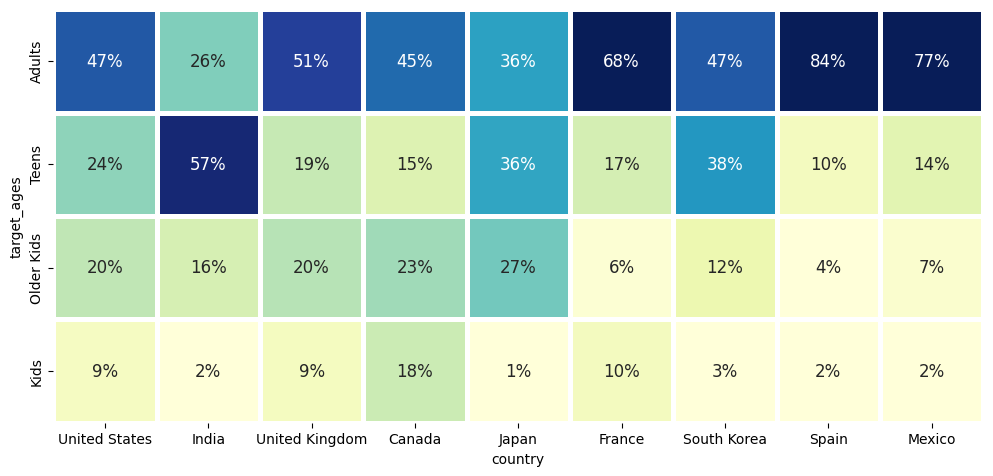

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


##### 1. Why did you pick the specific chart?

**When displaying the relationships between two categorical variables, in this case, countries and age groups, a heatmap is an appropriate choice. It makes it possible to clearly represent patterns, trends, and comparisons between various categories.**

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.**India**- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.**United Kingdom** -It has a relatively high level of interest among adults, with 51% expressing interest.

4.**Mexico**-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

5.**South Korea** , **United States**- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6.**Japan**- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7.**Canada**- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries**.

#### Chart - 15 -

In [63]:
netflix_df['count'] = 1
data1 = netflix_df.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

In [64]:
df_heatmap1 = netflix_df.loc[netflix_df['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in    Children & Family Movies  Children & Family Movies, Comedies  \
target_ages                                                                 
Adults                       0.000000                            0.000000   
Kids                         0.564972                            0.177515   
Older Kids                   0.435028                            0.816568   
Teens                        0.000000                            0.005917   

listed_in    Comedies, Dramas, International Movies  \
target_ages                                           
Adults                                     0.345679   
Kids                                       0.004115   
Older Kids                                 0.123457   
Teens                                      0.526749   

listed_in    Comedies, International Movies  Documentaries  \
target_ages                                                  
Adults                             0.484472       0.386228   
Kids                               0.012422       0.059880   
Older Kids                         0.099379       0.254491   
Teens                              0.403727       0.299401   

listed_in    Documentaries, International Movies  \
target_ages                                        
Adults                                  0.377907   
Kids                                    0.063953   
Older Kids                              0.238372   
Teens                                   0.319767   

listed_in    Dramas, Independent Movies, International Movies  \
target_ages                                                     
Adults                                               0.660465   
Kids                                                 0.004651   
Older Kids                                           0.083721   
Teens                                                0.251163   

listed_in    Dramas, International Movies  Kids' TV  Stand-Up Comedy  
target_ages                                                           
Adults                           0.468750  0.000000         0.894081  
Kids                             0.006250  0.565854         0.000000  
Older Kids                       0.109375  0.434146         0.018692  
Teens                            0.415625  0.000000         0.087227

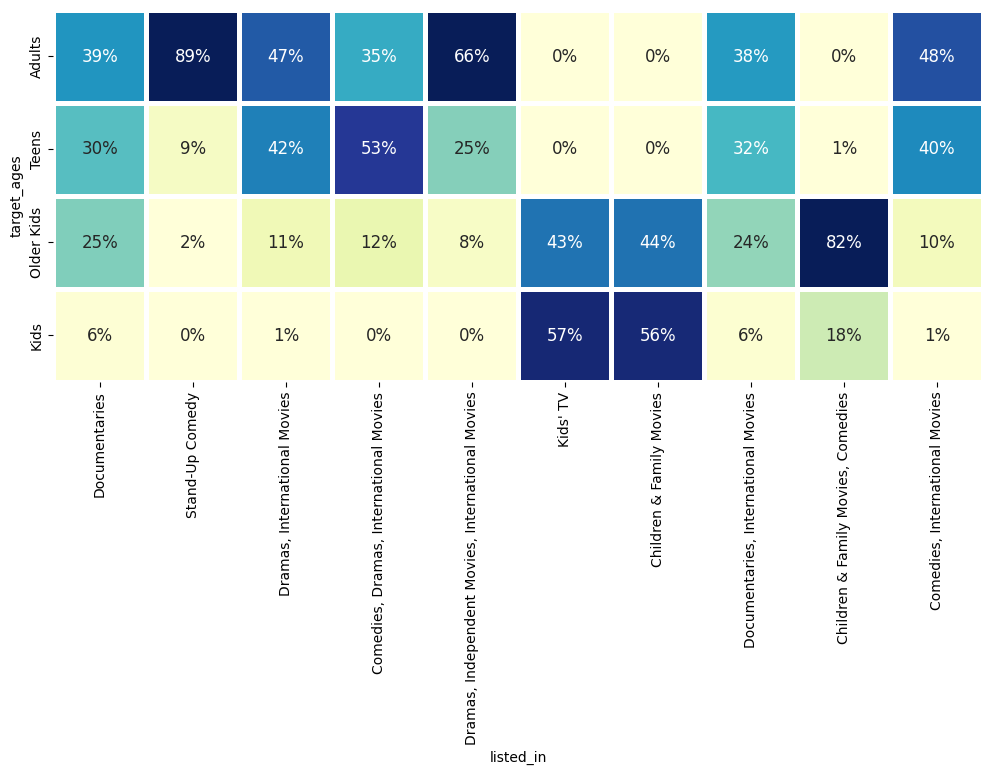

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

**This situation lends itself to the heatmap because I can use colour encoding to represent the data. The intensity of the colour corresponds to the frequency or proportion of different movie genres for each age group.**

##### 2. What is/are the insight(s) found from the chart?

**Stand-up comedy has the highest target audience, with 89% of adults.With 82% of the target audience, comedies for kids and families also have a sizable following. Kids & TV shows primarily target older children and adults, with a target audience of between 66% and 53%.**

## ***5. Hypothesis Testing***

In [66]:
#making copy of df_clean_frame

netflix_hypothesis=netflix_df.copy()

#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1  
4          1.0       Teens      1

In [67]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [68]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [69]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)


show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  day_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   

   month_added target_ages  count  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1

In [70]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [71]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [72]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [73]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [74]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

#### Based on your chart experiments, define hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**HO:Movies rated for children and older children usually run for at least two hours.(Null Hypothesis)**

**H1:Movies aimed at children and older children do not run for at least two hours.(Alternate Hypothesis)**

#### 2. Perform an appropriate statistical test.

In [75]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [76]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**t-value is not in the range, the null hypothesis is rejected.**

**As a result, movies rated for kids and older kids are not at least two hours long.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis

**Answer Here.**

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies





In [77]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_df.copy()

#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1  
3         11.0       Teens      1  
4          1.0       Teens      1

In [85]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [86]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   

   month_added target_ages  count  
0          8.0      Adults      1  
1         12.0      Adults      1  
2         12.0      Adults      1

In [87]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [88]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.775934

In [89]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [90]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


##### Which statistical test have you done to obtain P-Value?

In [91]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [92]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

**Answer Here.**

Because the t-value is not in the range, the null hypothesis is rejected.

**As a result, The duration which is more than 90 mins are movies**

## ***6. Feature Engineering & Data Pre-processing***

In [93]:
# Combining all the clustering attributes into a single column

netflix_df['clustering'] = (netflix_df['director'] + ' ' + netflix_df['cast'] +' ' +
                                 netflix_df['country'] +' ' + netflix_df['listed_in'] +
                                 ' ' + netflix_df['description'])

In [94]:
netflix_df['clustering'][30]

'Michael Margolis No cast Canada Documentaries, International Movies This pawesome documentary explores how our feline friends became online icons, from the earliest text memes to the rise of celebrity cat influencers.'

## Textual Data Preprocessing


In [95]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [97]:
netflix_df['Clean_Text'] = netflix_df['clustering'].apply(transform_text)

In [98]:
netflix_df["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

# **Text Vectorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

**Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:**


**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [99]:
bag_of_words = netflix_df.Clean_Text

In [100]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [101]:
print(X.shape)

(7787, 20000)


In [102]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)

# **Dimesionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why**

**Answer Here.**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [103]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

**Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**


From a dataset, PCA can extract the most important features. The original features are changed into a fresh set of principal components, which are uncorrelated variables. These elements capture the most variation present in the data because they are linear combinations of the original features.

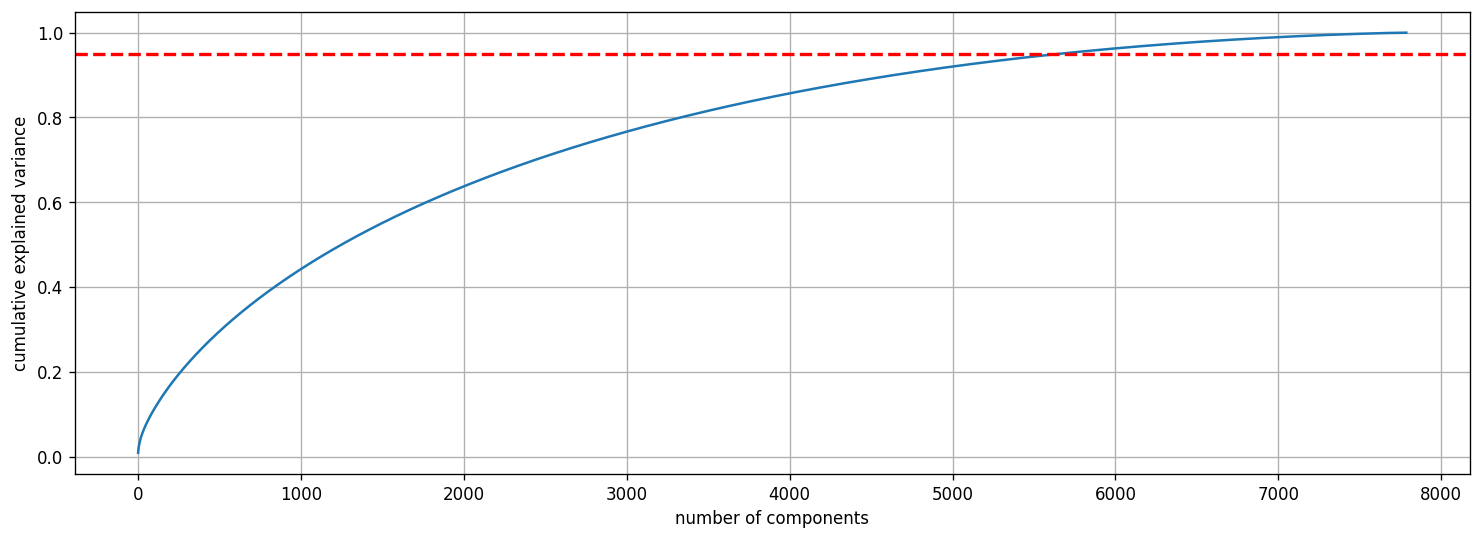

In [104]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

**The plot aids in deciding how many components should be taken into account for dimensionality reduction. You can decide how many components must be present for the cumulative explained variance to meet a certain standard, such as 95%. You can choose the right number of components for your analysis by looking at the point where the curve intersects or is closest to the threshold line.**

In [105]:
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7787, 5653)


In [106]:
X_transformed

array([[ 0.11980329, -0.02267127, -0.0122462 , ..., -0.00730293,
        -0.00697236, -0.00237195],
       [-0.04132775, -0.03107014,  0.02087998, ...,  0.00188454,
         0.01496376, -0.00731461],
       [-0.04110578, -0.04962319, -0.00337514, ..., -0.00691715,
         0.0026895 ,  0.00938257],
       ...,
       [-0.06622165,  0.11541688,  0.17191054, ..., -0.00495482,
         0.01456018, -0.0025139 ],
       [ 0.09595272,  0.00747056, -0.0022959 , ...,  0.00854873,
         0.00294345, -0.005817  ],
       [-0.07624317,  0.27774587,  0.18705256, ..., -0.00898035,
        -0.00039413,  0.00085025]])

## ***7. ML Model Implementation***

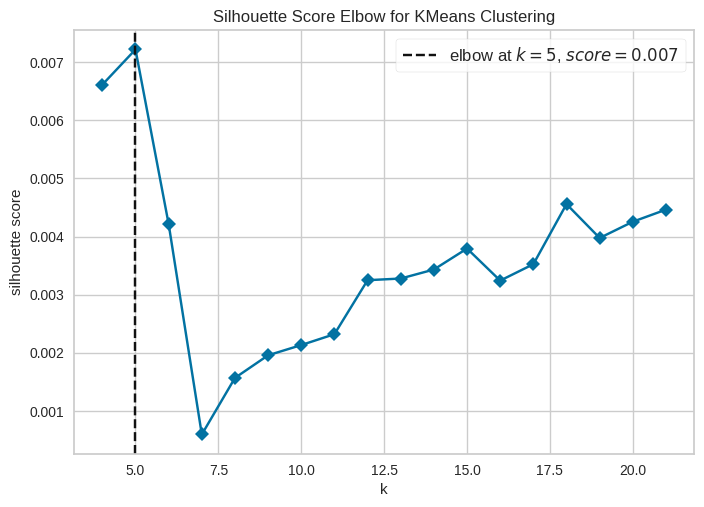

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [107]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

**The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters** .

In [108]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.0046214712918749255


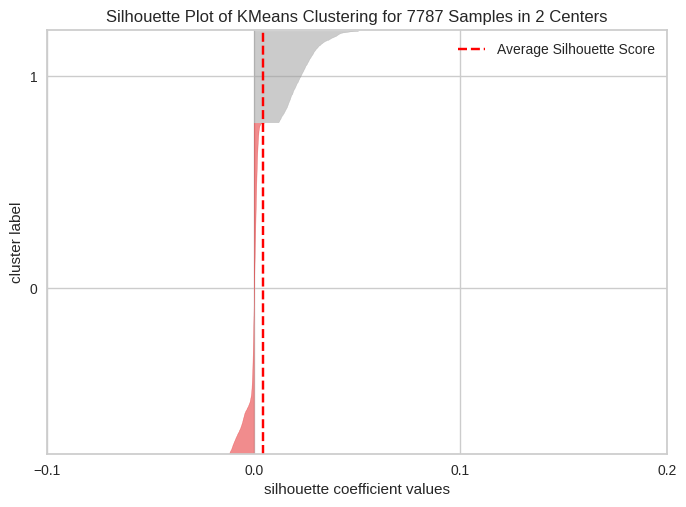

For n_clusters = 3, silhouette score is 0.005646625701933911


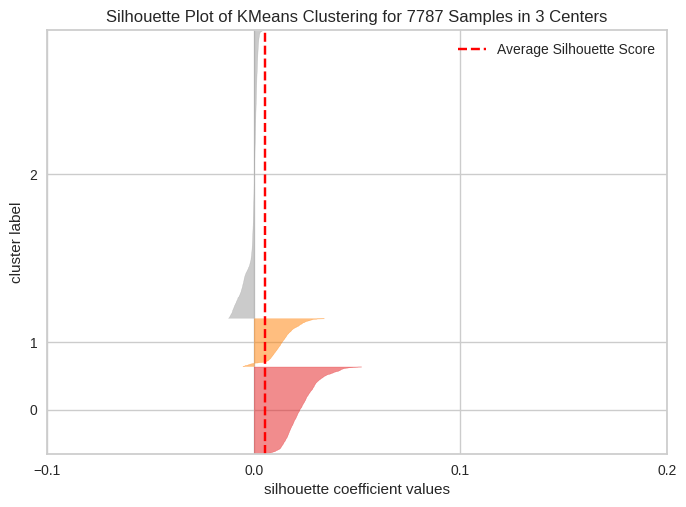

For n_clusters = 4, silhouette score is 0.006613359016102113


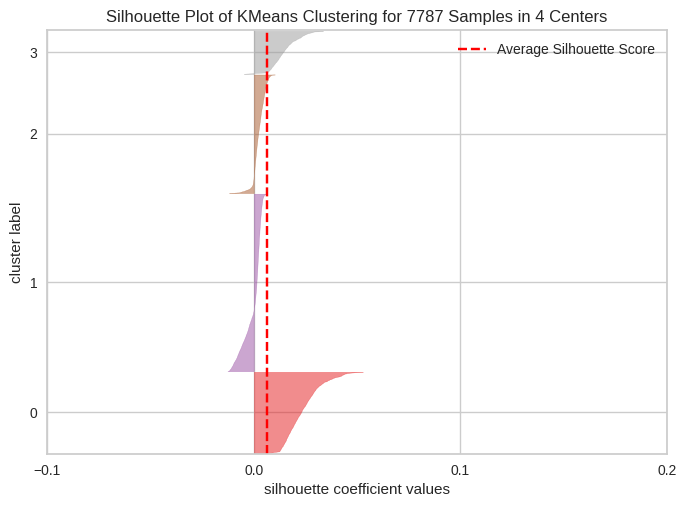

For n_clusters = 5, silhouette score is 0.007219063531029045


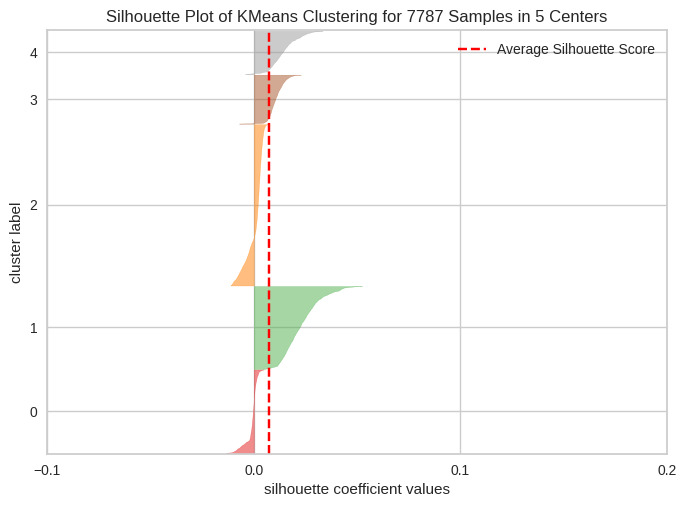

For n_clusters = 6, silhouette score is 0.00421562696026432


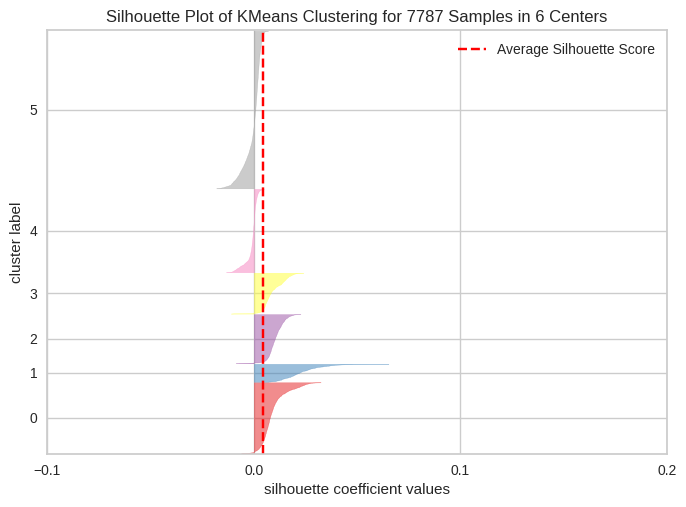

For n_clusters = 7, silhouette score is 0.000595180246123799


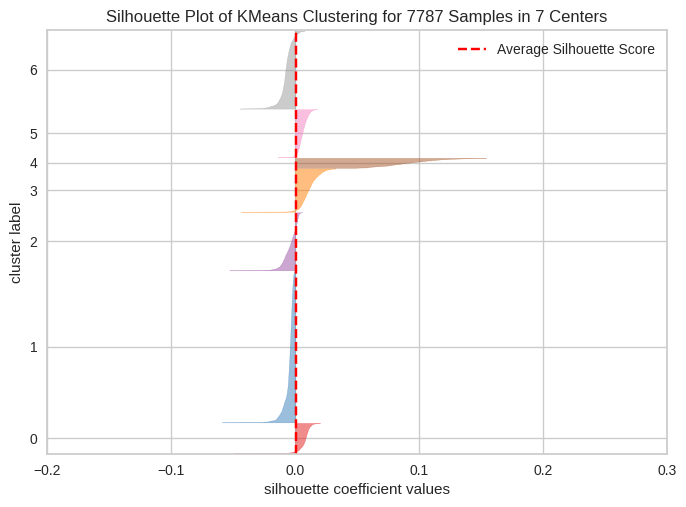

For n_clusters = 8, silhouette score is 0.0015683131187979329


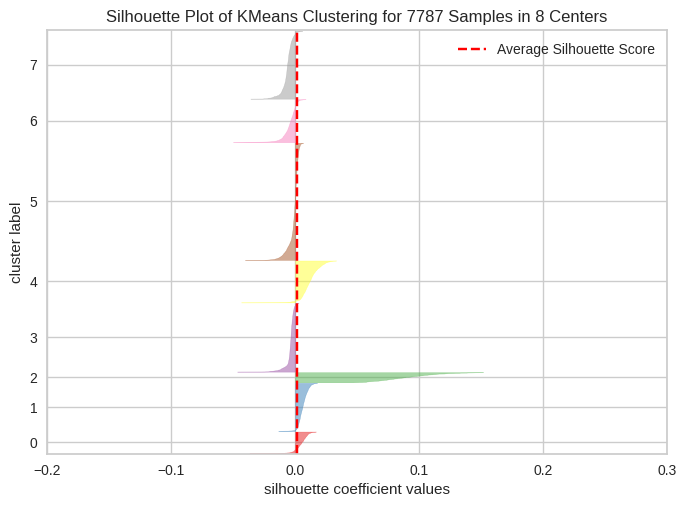

For n_clusters = 9, silhouette score is 0.001957680953506936


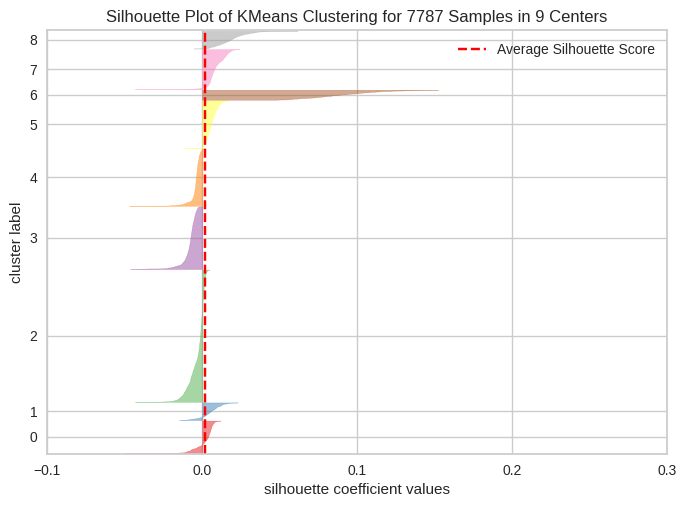

For n_clusters = 10, silhouette score is 0.0021335640033609757


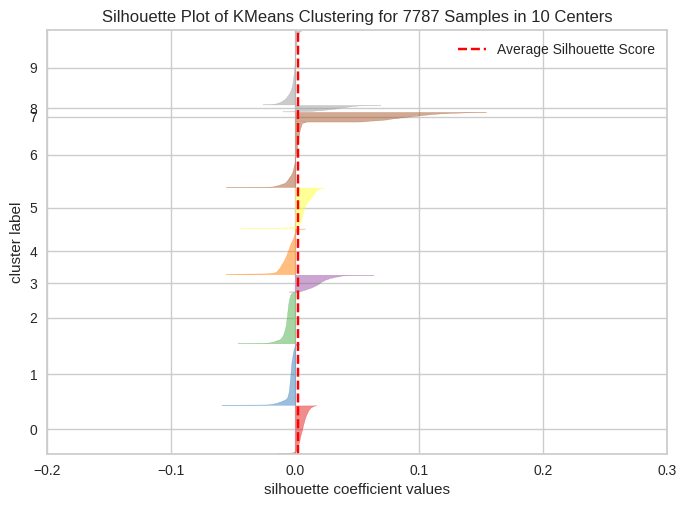

For n_clusters = 11, silhouette score is 0.0023206242937315815


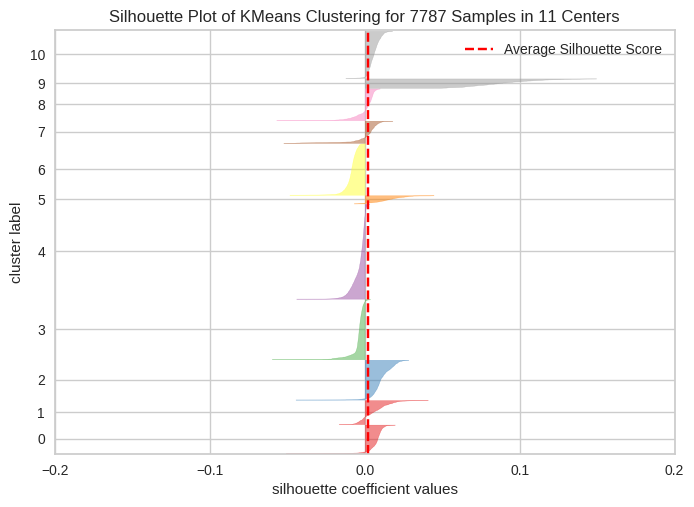

For n_clusters = 12, silhouette score is 0.0032494740752006274


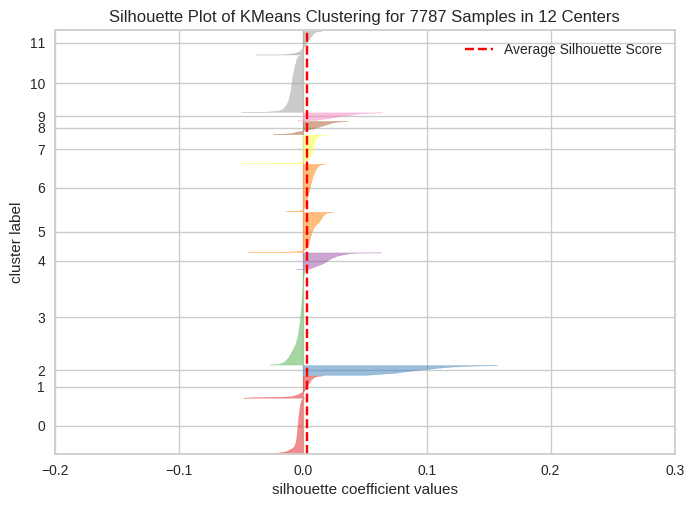

For n_clusters = 13, silhouette score is 0.003278222968532935


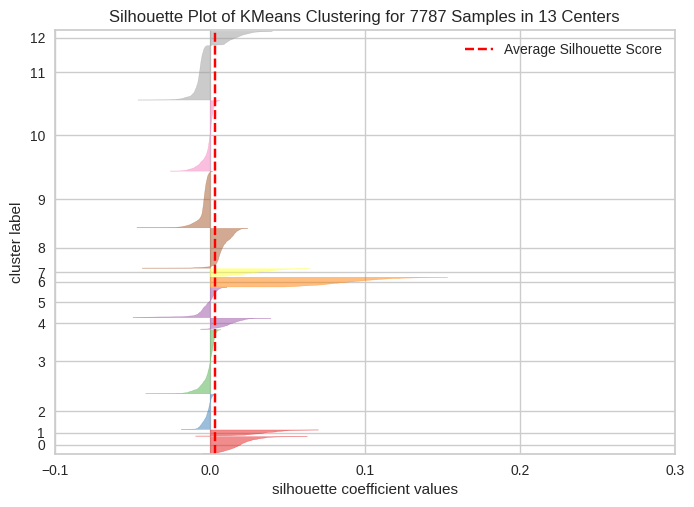

For n_clusters = 14, silhouette score is 0.0034330533449625947


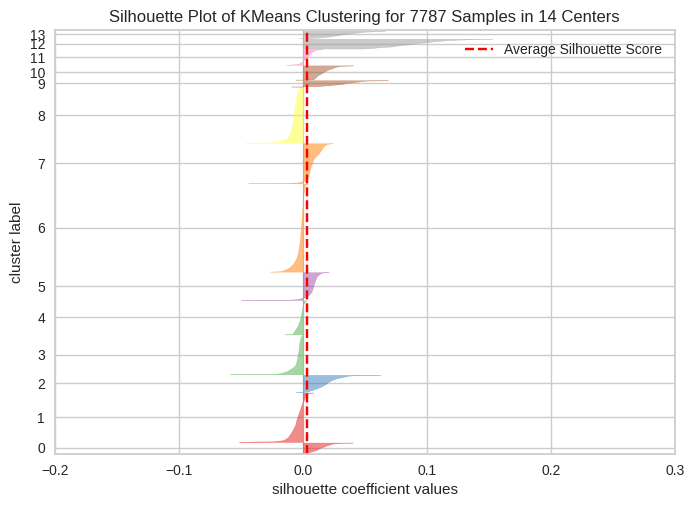

In [110]:
silhouette_score_analysis(15)

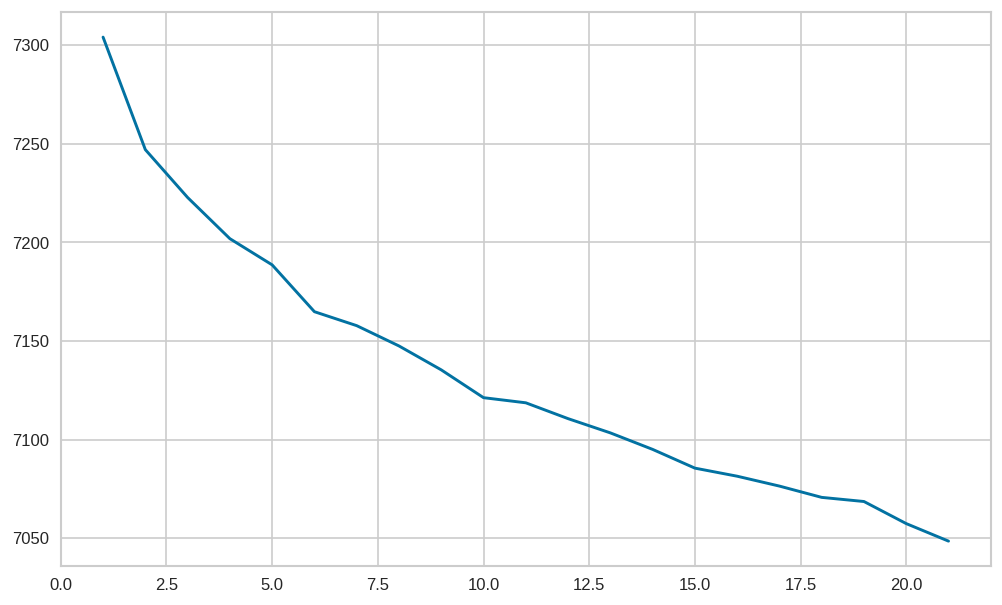

In [109]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)

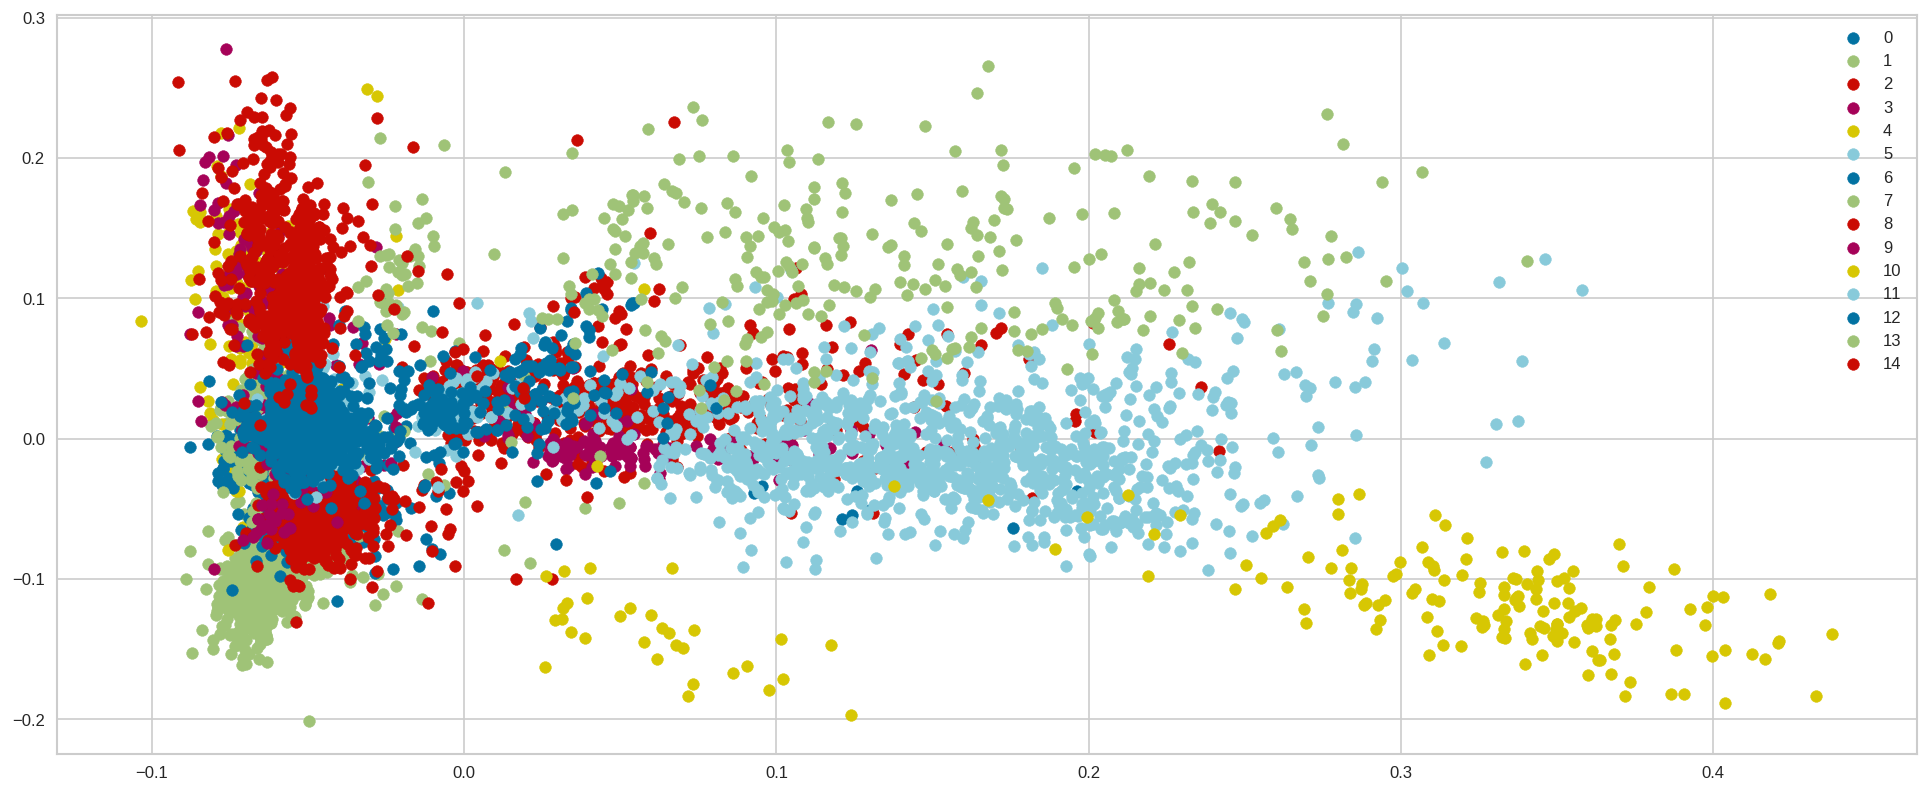

In [111]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

In [113]:
# Add cluster values to the dateframe.
netflix_df['cluster_number'] = kmeans.labels_

In [114]:
netflix_df.head(1)

show_id     type title director  \
0      s1  TV Show    3%            

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   

   month_added target_ages  count  \
0          8.0      Adults      1   

                                          clustering  \
0   João Miguel, Bianca Comparato, Michel Gomes, ...   

                                          Clean_Text  cluster_number  
0  joão miguel bianca comparato michel gomes rodo...               5

In [115]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = netflix_df['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

    clusters  cluster_number
0         12            1299
1          5            1013
2          8            1006
3          1             860
4         14             542
5          2             510
6          7             496
7          6             457
8         11             410
9         13             315
10         9             232
11         3             196
12        10             181
13         4             151
14         0             119


In [118]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_df[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()


Exploring Cluster 9
Looking for insights from type Movies/TV Shows


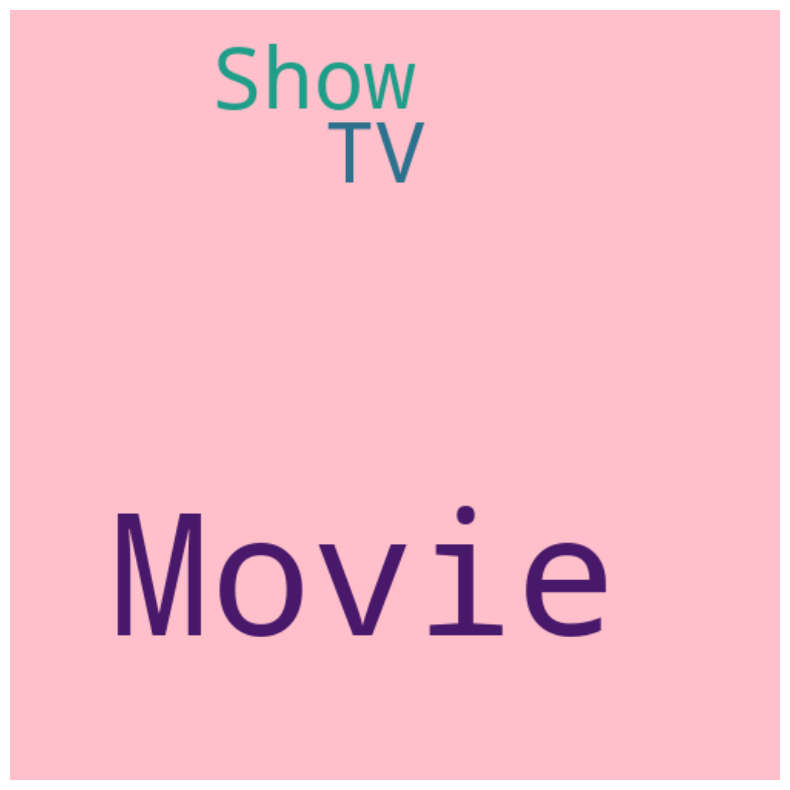

Looking for insights from title Movies/TV Shows


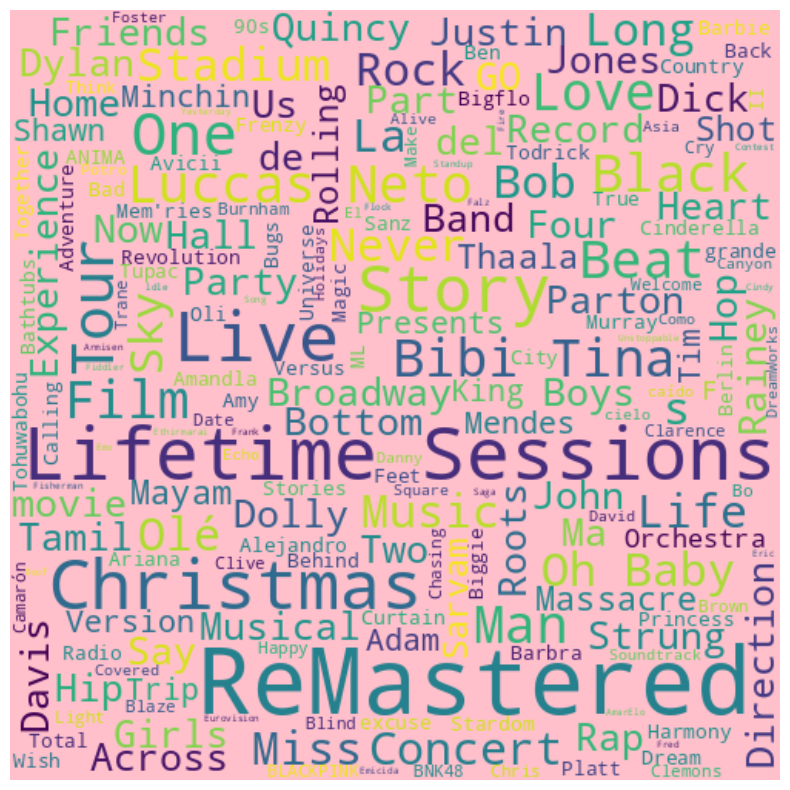

Looking for insights from country Movies/TV Shows


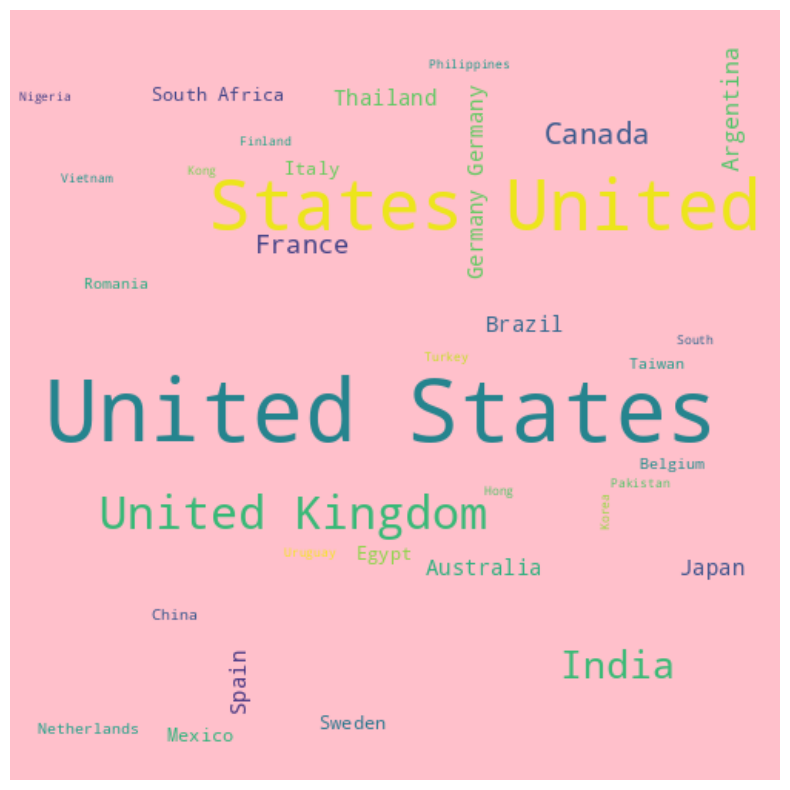

Looking for insights from rating Movies/TV Shows


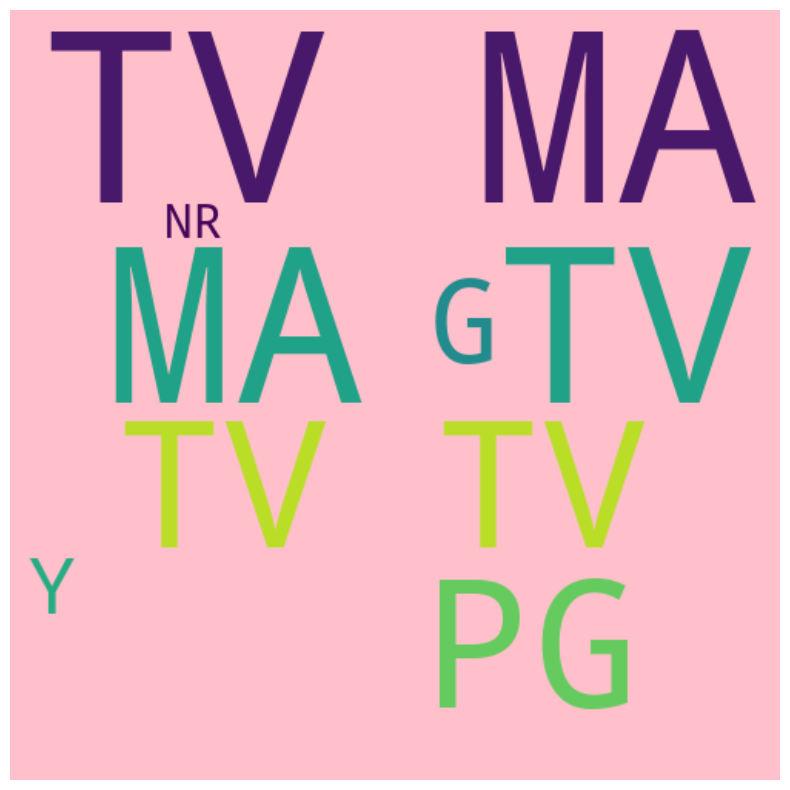

Looking for insights from listed_in Movies/TV Shows


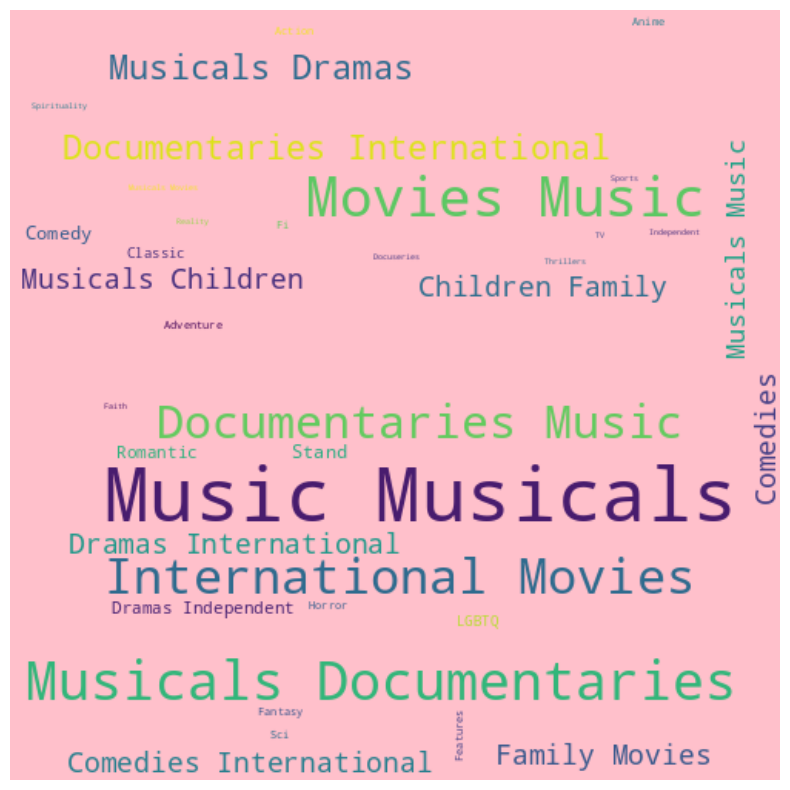

Looking for insights from description Movies/TV Shows


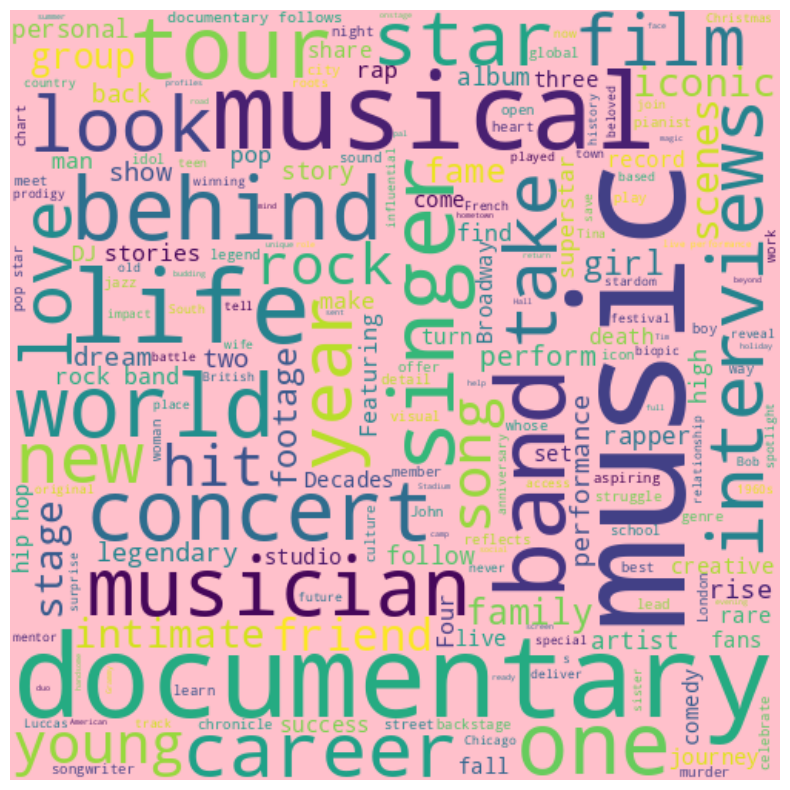

In [119]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Broadway,Remastered,Christmas ,Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA,PG-TV

**Listed_in** -  Dramas International,Musical Dramas,Musicial
            Documentaries,Comedies International

**Description**- Documentary ,Music,One,Bad,Tour ,Love.

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


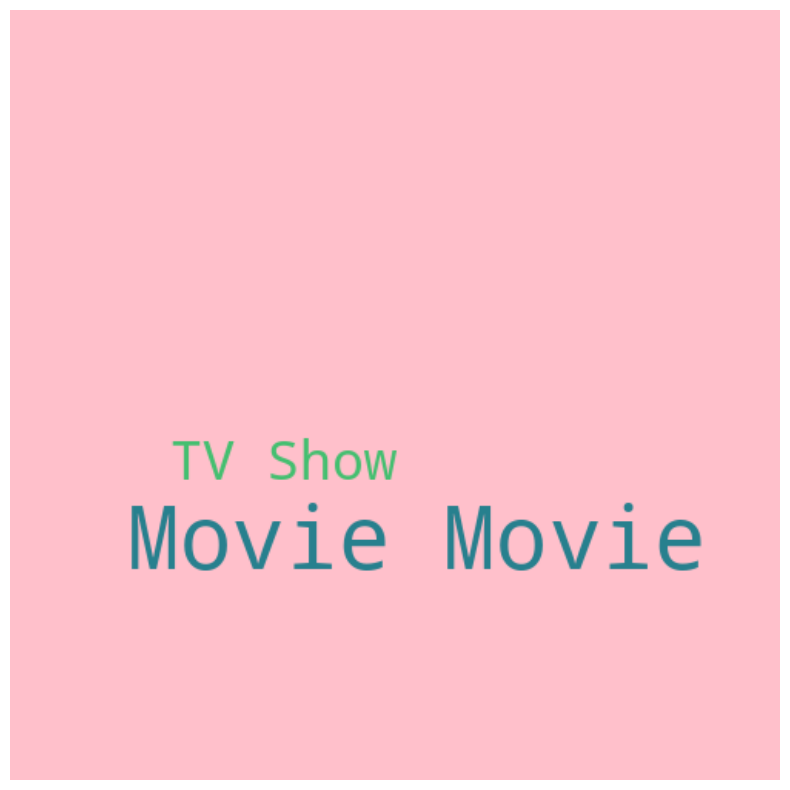

Looking for insights from title Movies/TV Shows


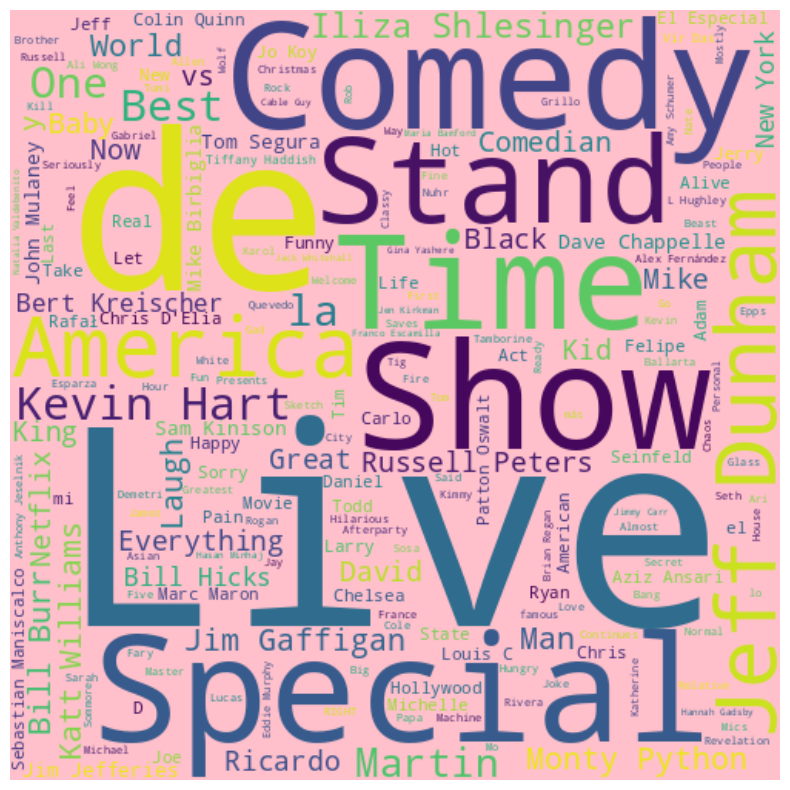

Looking for insights from country Movies/TV Shows


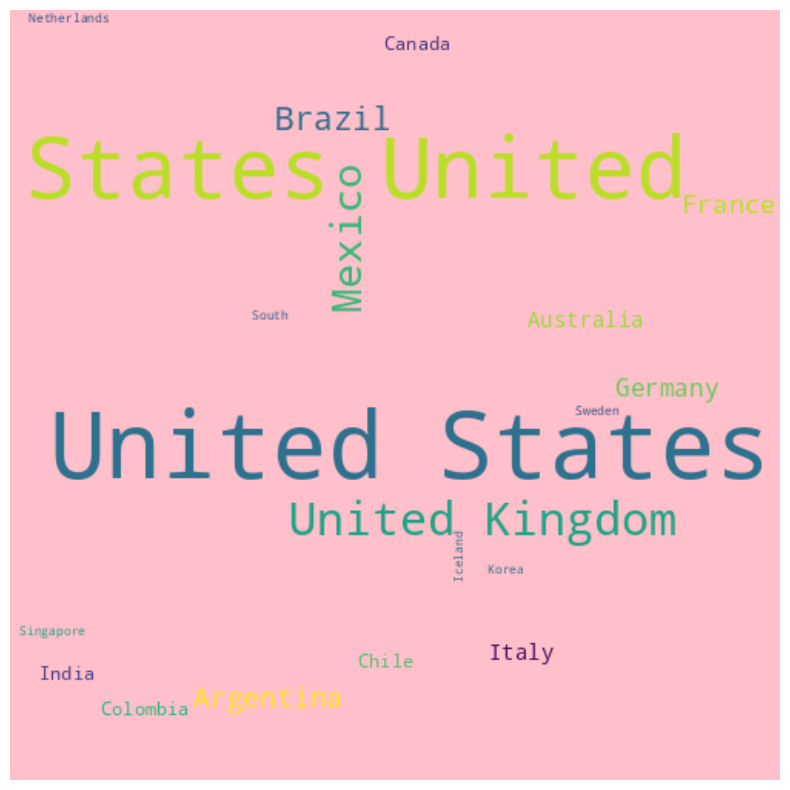

Looking for insights from rating Movies/TV Shows


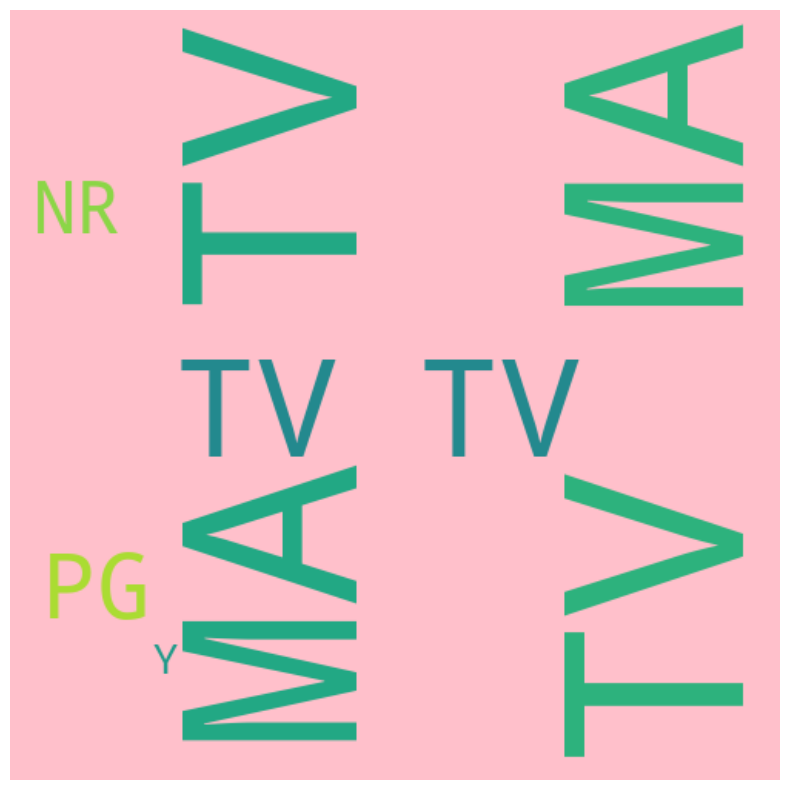

Looking for insights from listed_in Movies/TV Shows


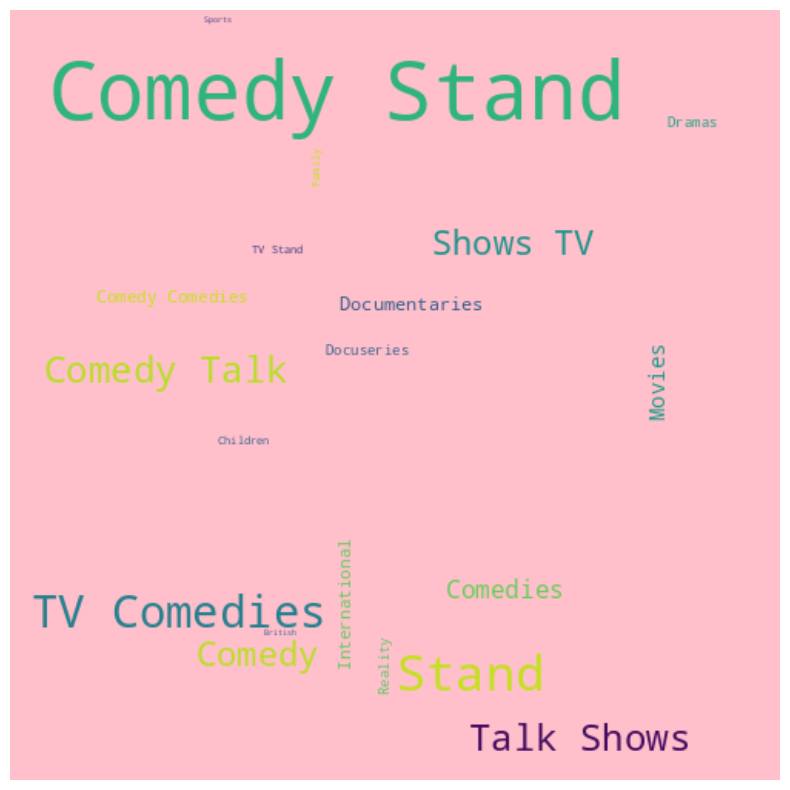

Looking for insights from description Movies/TV Shows


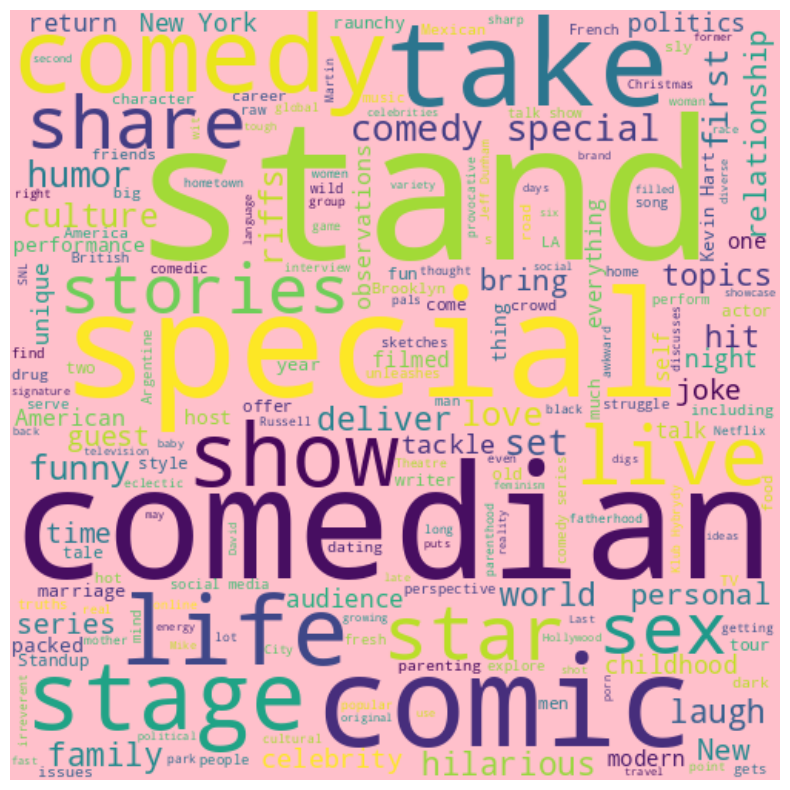

In [120]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive,
  Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows
            

**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

#  **Recommender system**

**A type of information filtering system known as a recommender system makes recommendations to users based on their preferences, interests, or previous actions. It frequently appears in a variety of applications, including social media, streaming services, and e-commerce websites. A recommender system's objective is to offer each user-specific recommendations that are pertinent and beneficial.**

Content Based Filtering : This method suggests products that are comparable to those that a user has previously liked or interacted with. It looks for comparable items to recommend after analysing the contents or characteristics of the items. For instance, if a user enjoys watching action films, the system might suggest additional action films based on actors, genre, or story.


In [121]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_df['description'] = netflix_df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [123]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [124]:
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [126]:
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [130]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]



In [131]:
netflix_df['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [132]:
get_recommendations( '14 Blades',cosine_sim)

2323                   G-Force
2935                    Iceman
2453                God of War
38         แผนร้ายนายเจ้าเล่ห์
2903            I Am Vengeance
6363     The Flying Guillotine
4901                     Polar
3030         Into the Badlands
3127    Jarhead: Law of Return
2212       Flying Guillotine 2
Name: title, dtype: object

## ***8.*** ***Future Work (Optional)***

This dataset can be combined with external sources like IMDB ratings, book clustering, and plant-based type clustering to produce a wealth of fascinating findings.

A more complete recommender system that provides users with improved recommendations could be created by incorporating additional data. Then, this system could be made available online for widespread use.

# **Conclusion**

1.It's noteworthy that most of the content offered on Netflix is in the form of movies. However, the platform has been emphasising TV shows more recently.

2- The majority of these shows debut at the end or beginning of the year.

3-Among the top five nations that create all of the content that is made available on the platform are the United States and India. Furthermore, six of the top ten actors with the most content hail from India.

4- TV-MA dominates the charts for content ratings, showing that mature content is more well-liked on Netflix.

5- The data were clustered using the value of k=15, which was found to be the best option. Ten different clusters were created using this value.

6- Using this information, a content-based recommender system was developed using cosine similarity, which offered suggestions for films and television programmes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***